<a href="https://colab.research.google.com/github/piyushsrivastav/Customer-acquisition/blob/main/Customer_Acquistion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1 style="color: #ff6600">Capstone Project (Cost Prediction on Acquiring Customers) </h1></center>

<h3><font color=blue>PROJECT OBJECTIVE:</font></h3>

##### Problem Statement
The goal of this analysis is to predict camaign cost of promotions run by Food Mart (CFM) in the USA (as per the details of the dataset). That is, given historical information about past campaigns (which stores participated, how was the ad distributed, which customers responded, etc.) can we use machine learning to estimate a budget for future campaigns of this type.

Note The crux of this problem, and the reason we want a prediction model, is that we don't know in advance how many customers will respond to the ad. If we, for example, markdown Pepsi bottles by 10% (ie. we sell the item at a 10% loss) we can work out unit loss (how much $$ we spend/loose per bottle sold), but we can't compute a budget (total cost) unless we estimate how many customers will purchase those bottles. A good way to estimate these numbers is via ML, hence this problem.

<h4 style="color: #66ccff">DATA DESCRIPTION</h4>

##### Food mart X is a chain of convenience stores in the United States. The private company’s headquarters are in Mentor, Ohio, and currently, approximately 325 stores are in the US. Convenient food mart operates on the franchise system.
- Cost: cost of acquiring customers in dollars (target).
- Customer details: marital status, gender, no. of children, education, occupation, and member card type. etc.
- Product details: brand name, SRP/MRP of the product, gross weight, net weight, and whether the food item has a recyclable package or not etc.
- Store details: store sales, cost, store type, city, state, grocery, frozen food, and meat area available in sqft. etc.
- Promotion details: name of the promotion done on the media


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_regression


from scipy.stats import chi2_contingency
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn import  metrics
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,RidgeCV
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import f_regression,SelectFromModel,SequentialFeatureSelector,SelectKBest

from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
import xgboost as xg
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage
#Sk learn is one of the most widely used libraries for machine learning. We'll use the k-means module.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# If using Google Colab
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Train.csv')
# df.head()

In [3]:
df = pd.read_csv('Train.csv')
df.head(n=5)

row_id      food_category      food_department     food_family  \
0       1  Bathroom Products   Health and Hygiene  Non-Consumable   
1       2              Fruit              Produce            Food   
2       3      Beer and Wine  Alcoholic Beverages           Drink   
3       4              Fruit      Canned Products            Food   
4       5     Paper Products            Household  Non-Consumable   

   store_sales(in millions)  store_cost(in millions)  unit_sales(in millions)  \
0                      4.35                   1.3485                        3   
1                      5.58                   1.8414                        3   
2                      5.10                   2.1420                        3   
3                      4.20                   2.0580                        3   
4                     10.35                   3.5190                        3   

          promotion_name sales_country marital_status  ... grocery_sqft  \
0       Double Down Sale        Canada              M  ...        16418   
1    Shelf Clearing Days           USA              S  ...        13305   
2           Two Day Sale        Mexico              S  ...        20141   
3  Cash Register Lottery           USA              S  ...        18670   
4           One Day Sale        Mexico              S  ...        30351   

   frozen_sqft meat_sqft coffee_bar video_store salad_bar  prepared_food  \
0         4016      2678          1           1         1              1   
1         4746      3164          1           0         0              0   
2         6393      4262          1           1         1              1   
3         5415      3610          1           1         1              1   
4         4819      3213          0           0         0              0   

  florist              media_type    cost  
0       1   Cash Register Handout  142.71  
1       0                   Radio   99.77  
2       1      Product Attachment   76.88  
3       1  Daily Paper, Radio, TV   55.59  
4       0          Street Handout  146.72  

[5 rows x 41 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36256 entries, 0 to 36255
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   row_id                      36256 non-null  int64  
 1   food_category               36256 non-null  object 
 2   food_department             36256 non-null  object 
 3   food_family                 36256 non-null  object 
 4   store_sales(in millions)    36256 non-null  float64
 5   store_cost(in millions)     36256 non-null  float64
 6   unit_sales(in millions)     36256 non-null  int64  
 7   promotion_name              36256 non-null  object 
 8   sales_country               36256 non-null  object 
 9   marital_status              36256 non-null  object 
 10  gender                      36256 non-null  object 
 11  total_children              36256 non-null  int64  
 12  education                   36256 non-null  object 
 13  member_card                 362

In [5]:
df1 = pd.read_csv('Test.csv')

<h4 style="color: #66ccff">Checking the size of Test and Train Data</h4>

In [6]:
df.shape

(36256, 41)

In [7]:
df1.shape

(12086, 41)

<h4 style="color: #66ccff"> Checking summary statistics of the dataset, and writing key observations.</h4>

In [8]:
np.round(df.describe(),2).transpose()

count      mean       std       min       25%  \
row_id                      36256.0  18128.50  10466.35      1.00   9064.75   
store_sales(in millions)    36256.0      6.55      3.47      0.52      3.80   
store_cost(in millions)     36256.0      2.62      1.45      0.18      1.50   
unit_sales(in millions)     36256.0      3.09      0.83      1.00      3.00   
total_children              36256.0      2.55      1.49      0.00      1.00   
avg_cars_at home(approx)    36256.0      2.20      1.11      0.00      1.00   
num_children_at_home        36256.0      0.84      1.31      0.00      0.00   
avg_cars_at home(approx).1  36256.0      2.20      1.11      0.00      1.00   
SRP                         36256.0      2.12      0.93      0.50      1.42   
gross_weight                36256.0     13.78      4.61      6.00      9.70   
net_weight                  36256.0     11.77      4.67      3.05      7.71   
recyclable_package          36256.0      0.56      0.50      0.00      0.00   
low_fat                     36256.0      0.35      0.48      0.00      0.00   
units_per_case              36256.0     18.89     10.26      1.00     10.00   
store_sqft                  36256.0  27989.29   5701.67  20319.00  23593.00   
grocery_sqft                36256.0  19135.20   3989.40  13305.00  16232.00   
frozen_sqft                 36256.0   5312.50   1575.77   2452.00   4746.00   
meat_sqft                   36256.0   3541.61   1050.38   1635.00   3164.00   
coffee_bar                  36256.0      0.61      0.49      0.00      0.00   
video_store                 36256.0      0.35      0.48      0.00      0.00   
salad_bar                   36256.0      0.59      0.49      0.00      0.00   
prepared_food               36256.0      0.59      0.49      0.00      0.00   
florist                     36256.0      0.56      0.50      0.00      0.00   
cost                        36256.0     99.26     30.01     50.79     69.65   

                                 50%       75%       max  
row_id                      18128.50  27192.25  36256.00  
store_sales(in millions)        5.94      8.67     22.92  
store_cost(in millions)         2.39      3.49      9.73  
unit_sales(in millions)         3.00      4.00      6.00  
total_children                  3.00      4.00      5.00  
avg_cars_at home(approx)        2.00      3.00      4.00  
num_children_at_home            0.00      1.00      5.00  
avg_cars_at home(approx).1      2.00      3.00      4.00  
SRP                             2.13      2.79      3.98  
gross_weight                   13.60     17.70     21.90  
net_weight                     11.50     15.80     20.80  
recyclable_package              1.00      1.00      1.00  
low_fat                         0.00      1.00      1.00  
units_per_case                 19.00     28.00     36.00  
store_sqft                  27694.00  30797.00  39696.00  
grocery_sqft                18670.00  22123.00  30351.00  
frozen_sqft                  5062.00   5751.00   9184.00  
meat_sqft                    3375.00   3834.00   6122.00  
coffee_bar                      1.00      1.00      1.00  
video_store                     0.00      1.00      1.00  
salad_bar                       1.00      1.00      1.00  
prepared_food                   1.00      1.00      1.00  
florist                         1.00      1.00      1.00  
cost                           98.52    126.62    149.75

In [9]:
np.round(df.describe(include = "O"),2).transpose()

count unique                  top   freq
food_category       36256     45           Vegetables   4432
food_department     36256     22              Produce   5129
food_family         36256      3                 Food  25909
promotion_name      36256     49     Weekend Markdown   1398
sales_country       36256      3                  USA  23338
marital_status      36256      2                    S  18137
gender              36256      2                    F  18551
education           36256      5  Partial High School  10924
member_card         36256      4               Bronze  20260
occupation          36256      5         Professional  11967
houseowner          36256      2                    Y  21938
avg. yearly_income  36256      8          $30K - $50K  11616
brand_name          36256    111             Hermanos   1097
store_type          36256      5          Supermarket  15707
store_city          36256     19               Tacoma   3420
store_state         36256     10                   WA  11622
media_type          36256     13   Daily Paper, Radio   4086

<h2><font color=blue> Data cleansing</font></h2>

In [10]:
def checkParcentMissingValues(df):
    Missing_Values = (df.isnull() | df.isna()).sum().any()
    if(Missing_Values == False):
        print("Given DataFrame has no Missing Value")
    elif(Missing_Values == True):
        missing_col = df.columns[df.isnull().mean()!=0]
        percentage_miss_val = df[missing_col].isnull().sum()/len(df)*100
        print('Columns having null values with its dtype are: \033[1m', missing_col,'\033[0m')  
        print('\033[0mNo.Of Null/Missing rows:\033[1m' , df[missing_col].isnull().sum().sum())
    return

checkParcentMissingValues(df) 

Given DataFrame has no Missing Value


In [11]:
def checkDuplicateValues(df):
    Duplicate_Values = df.duplicated().sum().any()
    if Duplicate_Values == True:
        print("shape of the dataframe before removing duplicated", df.shape)
        print("No.of Duplicate records in the DataFrame:",df.duplicated().sum())
        df.drop_duplicates(keep='first', inplace=True)
        print("All the Duplicate records are removed and only original values have been retained in the DataFrame.") 
        print("shape of the dataframe after removing duplicated", df.shape)    
    elif Duplicate_Values == False:
        print("Given DataFrame has no Duplicate Records")
    return

checkDuplicateValues(df)

Given DataFrame has no Duplicate Records


Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.


Interquartile Range Method:

- Interquartile Range (IQR): We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.
- Boxplots: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).

Outlier Removal Tradeoff:
We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.


The Tradeoff: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy.

Summary:
- Visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. 
- Determining the threshold: After we decide which number we will use to multiply with the iqr (the lower more outliers removed), we will proceed in determining the upper and lower thresholds by substrating q25 - threshold (lower extreme threshold) and adding q75 + threshold (upper extreme threshold).
- Conditional Dropping: Lastly, we create a conditional dropping stating that if the "threshold" is exceeded in both extremes, the instances will be removed.
- Boxplot Representation: Visualize through the boxplot that the number of "extreme outliers" have been reduced to a considerable amount.

Note: Some outliers can however distort the accuracy of our models but we have to avoid an extreme amount of information loss or else our model runs the risk of underfitting.

<h2 ><font color=#990000> Observations</font></h2>
- Most of data seem to be well normally distributed except at few instances, abnormality can be seen

### Outliers present in the column
- store_sales(in millions)
- store_cost(in millions)

Mentioned below 3 columns have negligible amount of ouliers which we can ignore
  - num_children_at_home
  - frozen_sqft
  - meat_sqft
  - unit_sales(in millions)

In [12]:
def outliers_handling(df, col_name):
    if (str(df[col_name].dtypes) == 'object'):
        df[col_name] = df[col_name].astype(int) # convert object to int
    
    sns.boxplot(x=df[col_name])
    plt.title("Box Plot Before removing outliers")
    plt.show()
    print("\nchecking the skewness before transformation",df[[col_name]].skew().values[0])
    
    print("\n Now Using iqr approach for handling outliers.\n")
    q1= df[col_name].quantile(0.25)
    q3= df[col_name].quantile(0.75)
    iqr= q3-q1
    Lower_tail=q1-1.5*iqr
    Upper_tail=q3+1.5*iqr
    for i in range(0,len(df[col_name])):
        if df[col_name][i] > Upper_tail or df[col_name][i] < Lower_tail:
            df[col_name] = df[col_name].replace(df[col_name][i],np.median(df[col_name]))
            # replacing outliers with median values
    
    
    sns.boxplot(x=df[col_name])
    plt.title("Box Plot After removing outliers")
    plt.show()
    print("\nchecking the skewness after transformation",df[[col_name]].skew().values[0])

    return

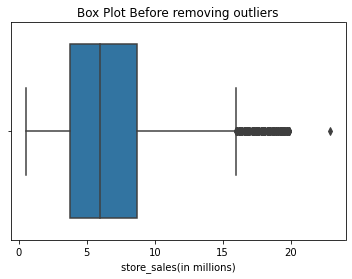


checking the skewness before transformation 0.6866210468760011

 Now Using iqr approach for handling outliers.



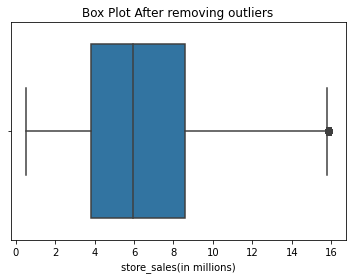


checking the skewness after transformation 0.5826441141374837


In [13]:
outliers_handling(df,'store_sales(in millions)')

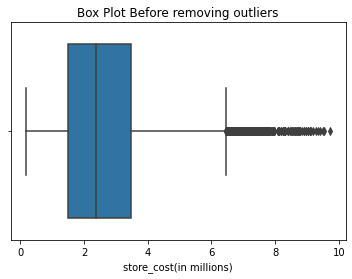


checking the skewness before transformation 0.8444614677746828

 Now Using iqr approach for handling outliers.



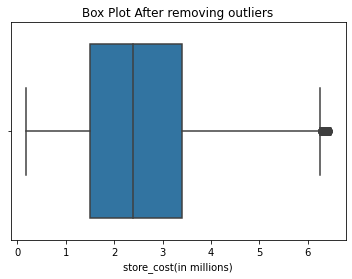


checking the skewness after transformation 0.588156718896177


In [14]:
outliers_handling(df,'store_cost(in millions)')

<h1 style="color:blue"><center> Exploratory Data Analysis</center></h1>
The main goal here is to find the maximum features that affect the prediction of cost to acquire a customer via media so we will focus on EDA and inferential analytics if necessary to explore the features

<h2 style="color: #66ccff">Univariate Analysis :</h2>

<h4><font color=#FF0000>Univariate analysis for Categorical features:-</font></h4>

In [15]:
categorical_features = df.select_dtypes(include=[np.object])
print('Catagorial Column names: \n',list(categorical_features.columns), "\n\nNo.of Columns: ", len(categorical_features.columns))

Catagorial Column names: 
 ['food_category', 'food_department', 'food_family', 'promotion_name', 'sales_country', 'marital_status', 'gender', 'education', 'member_card', 'occupation', 'houseowner', 'avg. yearly_income', 'brand_name', 'store_type', 'store_city', 'store_state', 'media_type'] 

No.of Columns:  17


<h3 style="color: #66ccff"> Count plot</h3>

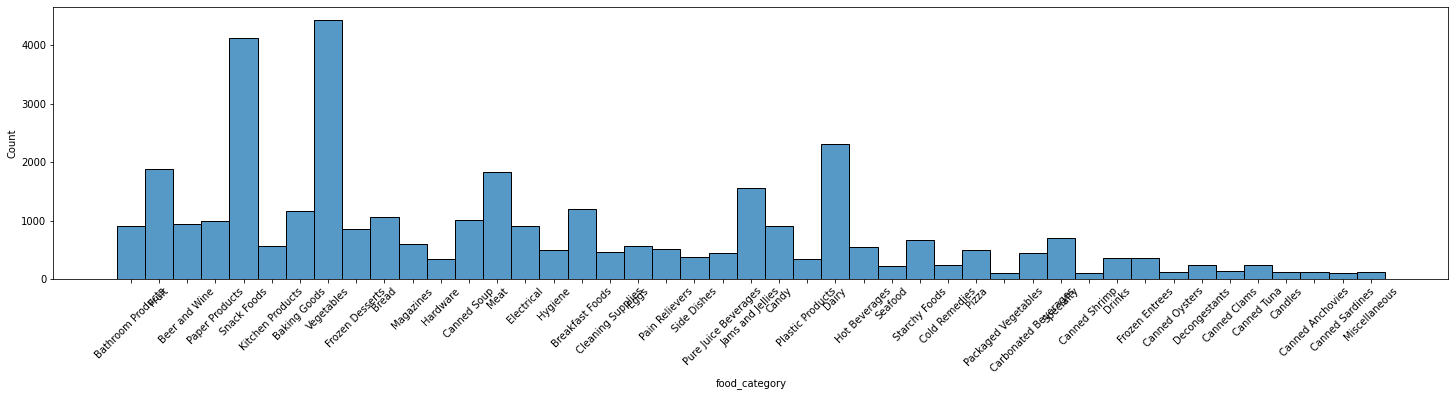

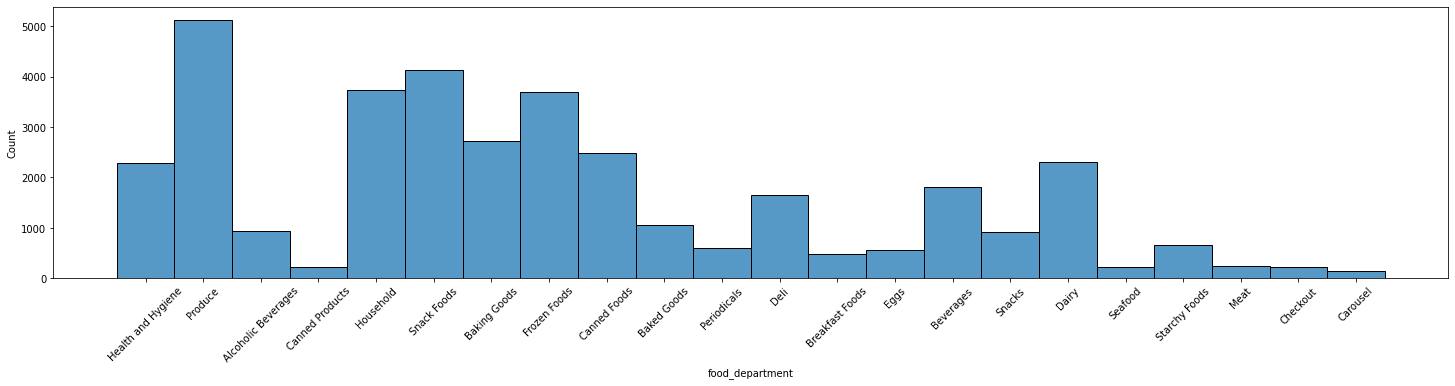

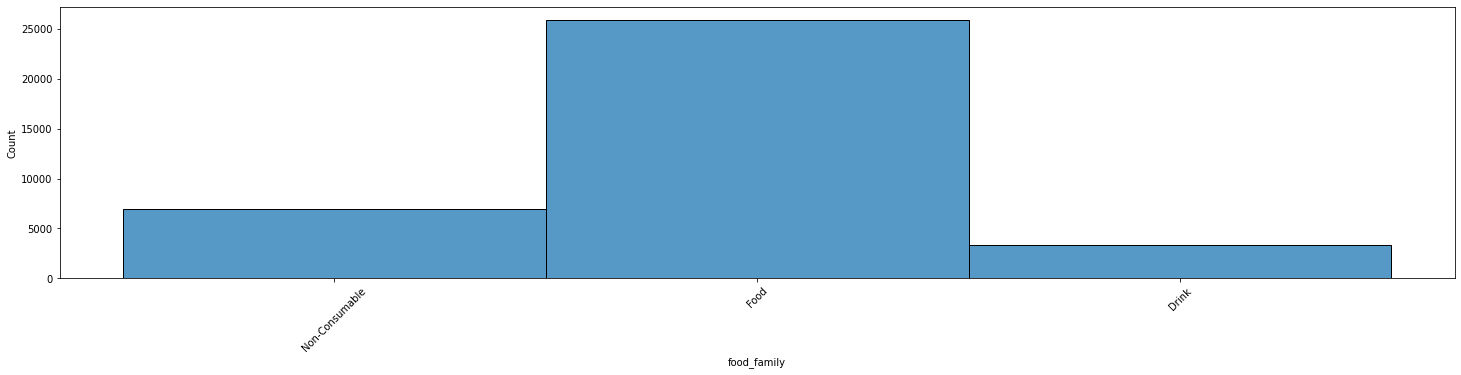

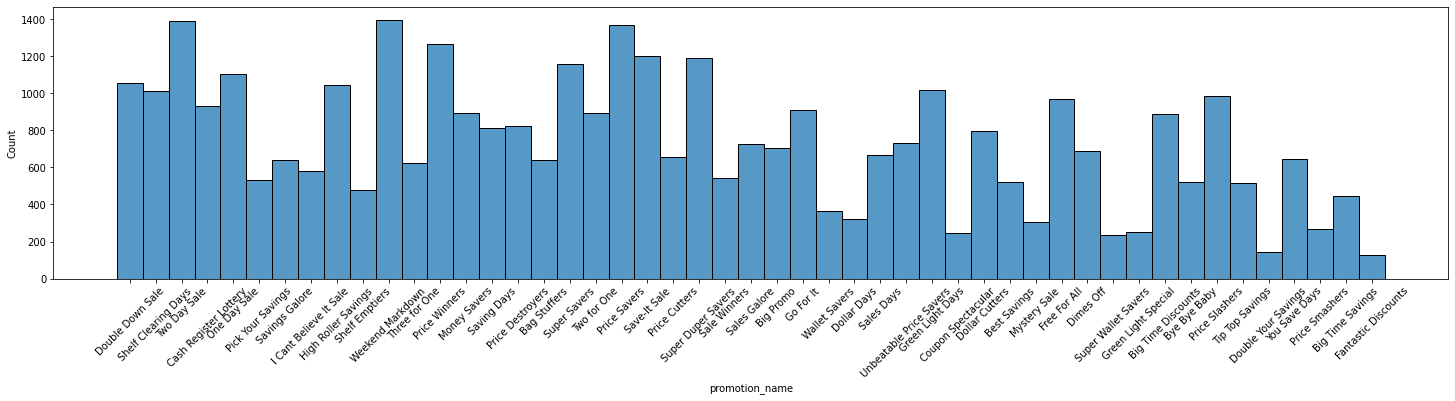

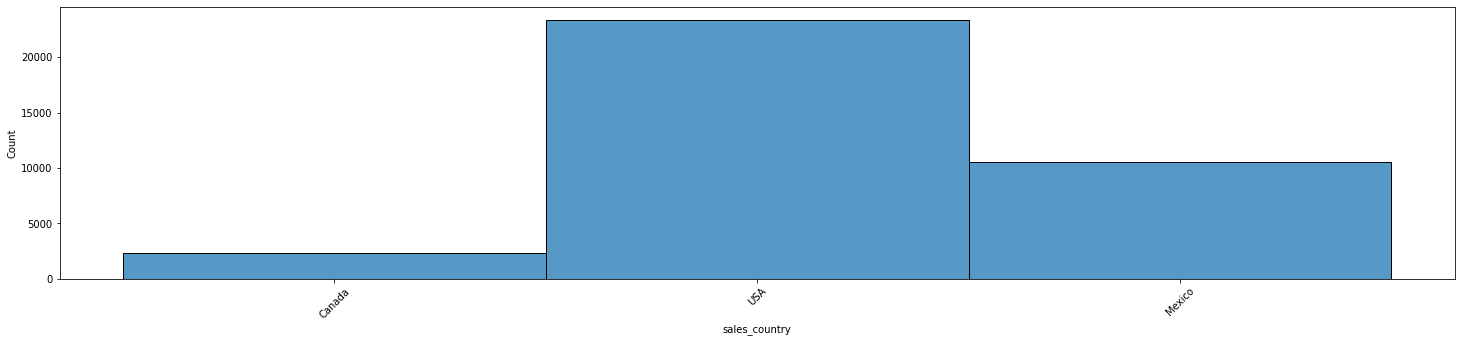

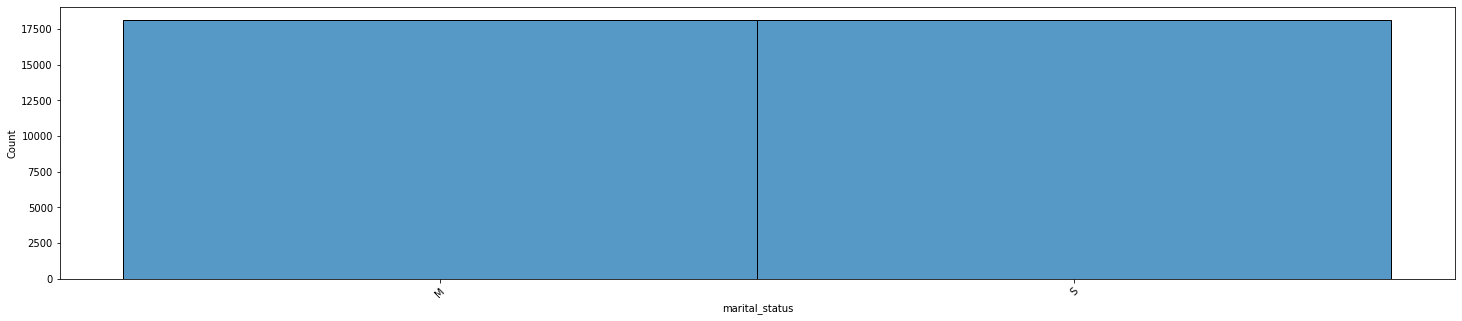

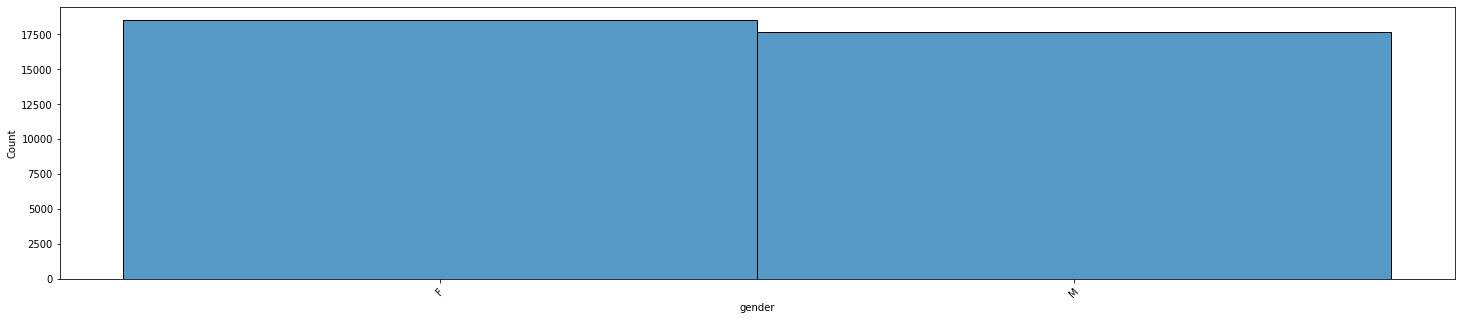

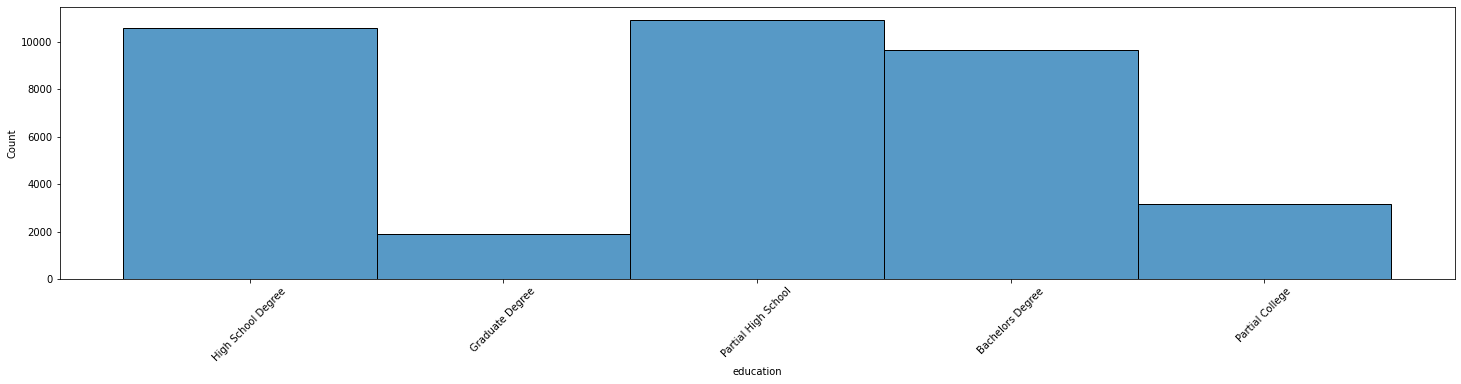

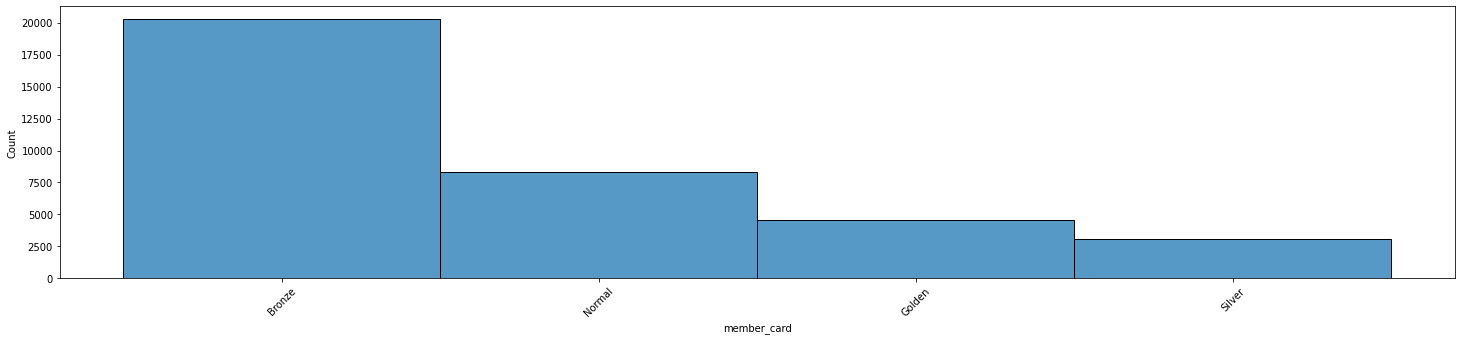

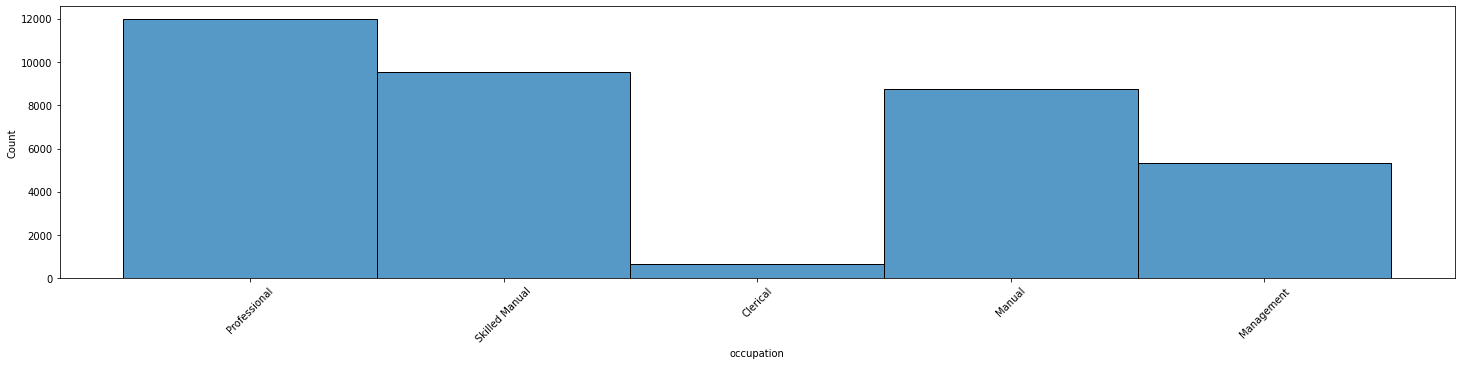

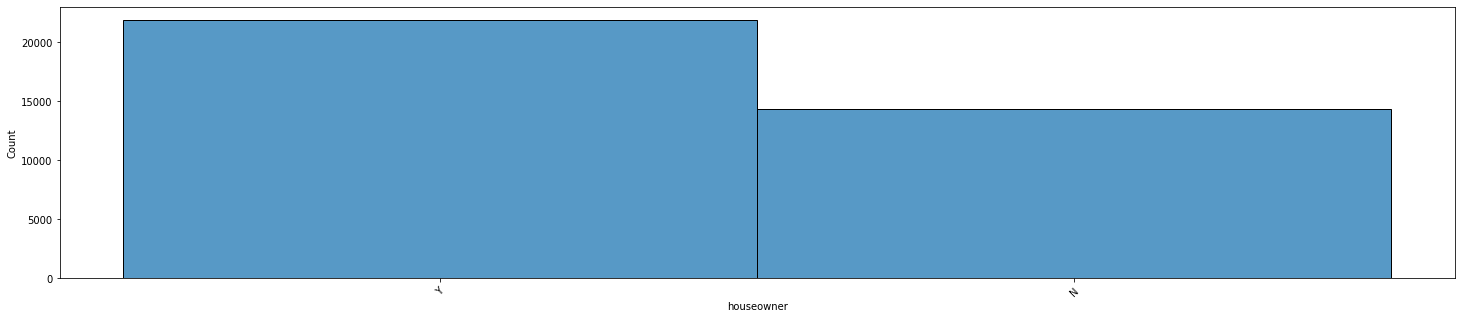

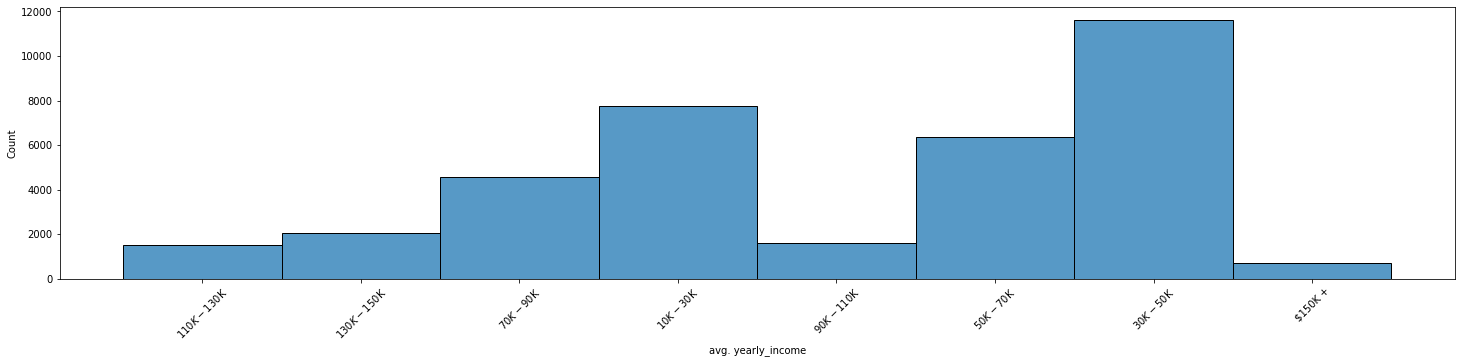

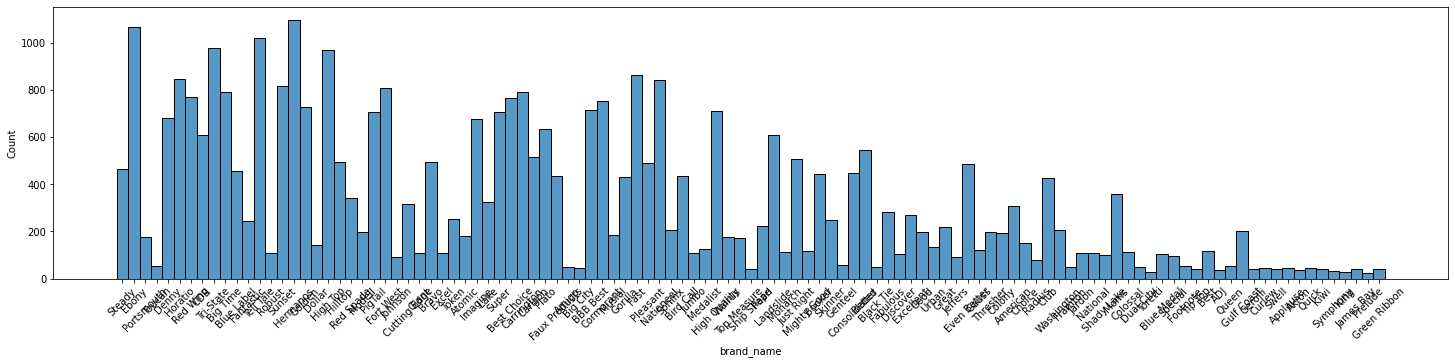

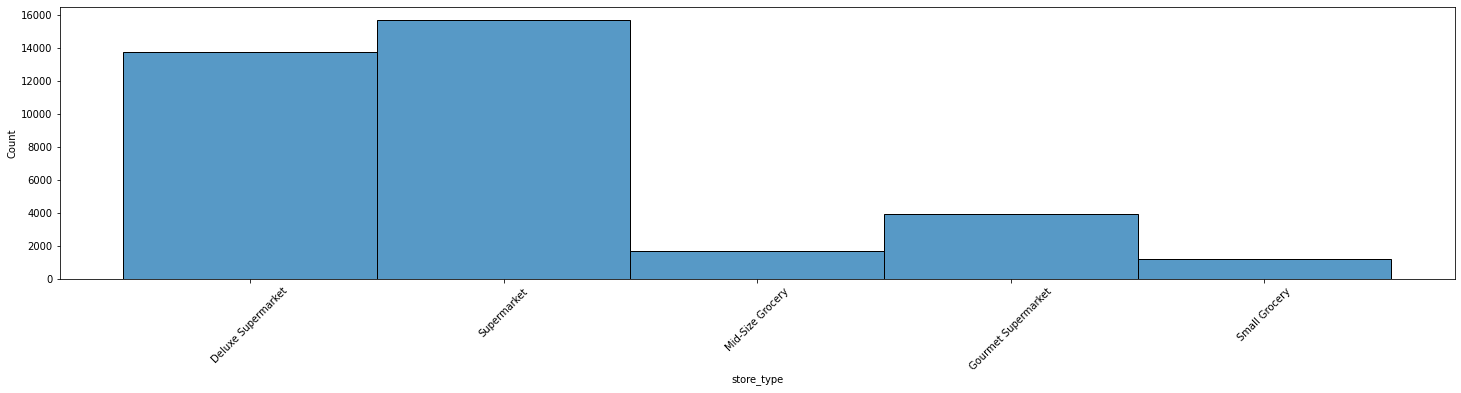

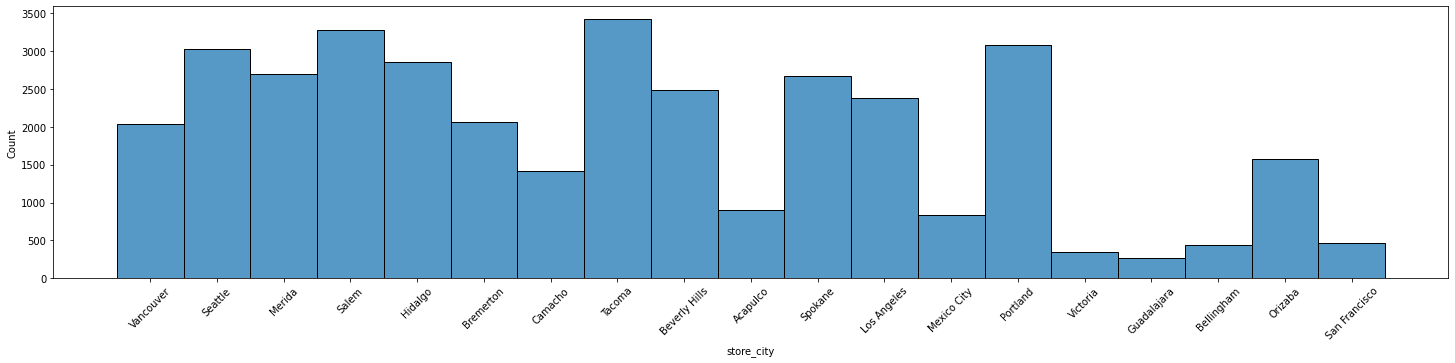

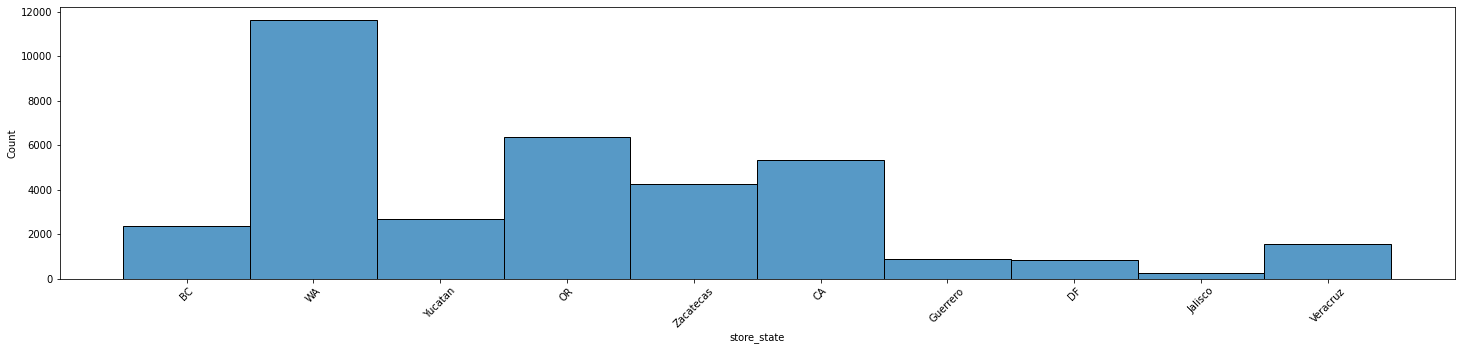

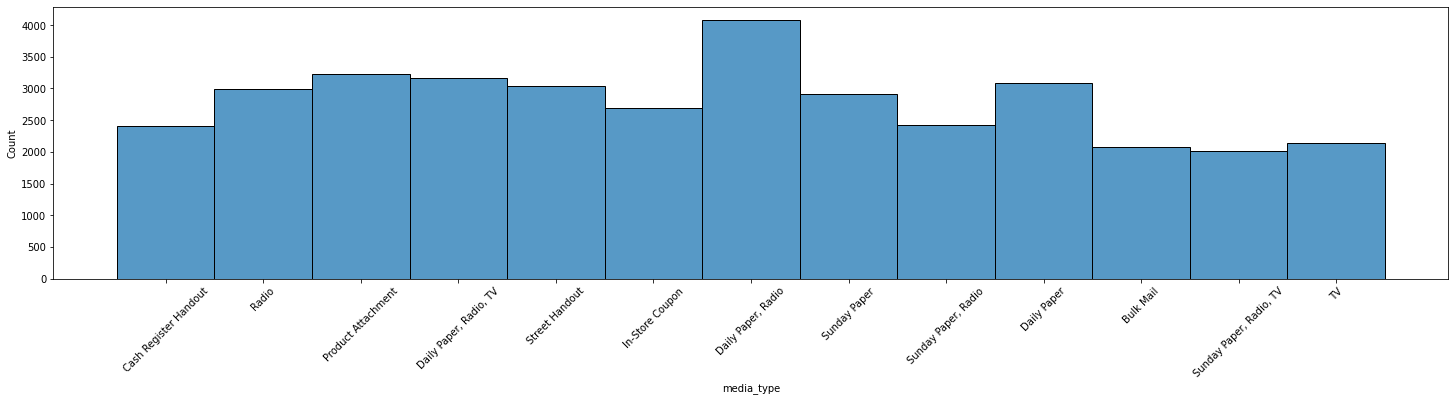

In [16]:
i = 1
for feature in categorical_features:
        plt.figure(figsize = (25,5))
        # g=sns.countplot(x = feature, data = df)
        # g.set_xticklabels(labels=feature,rotation=30,horizontalalignment='right')
        ax = sns.histplot(data=df, x=feature)
        ax.tick_params(axis='x', rotation=45)
        i +=1
        
        # Show the plot
        plt.show()

<h3 style="color: #66ccff"> Pie chart</h3>

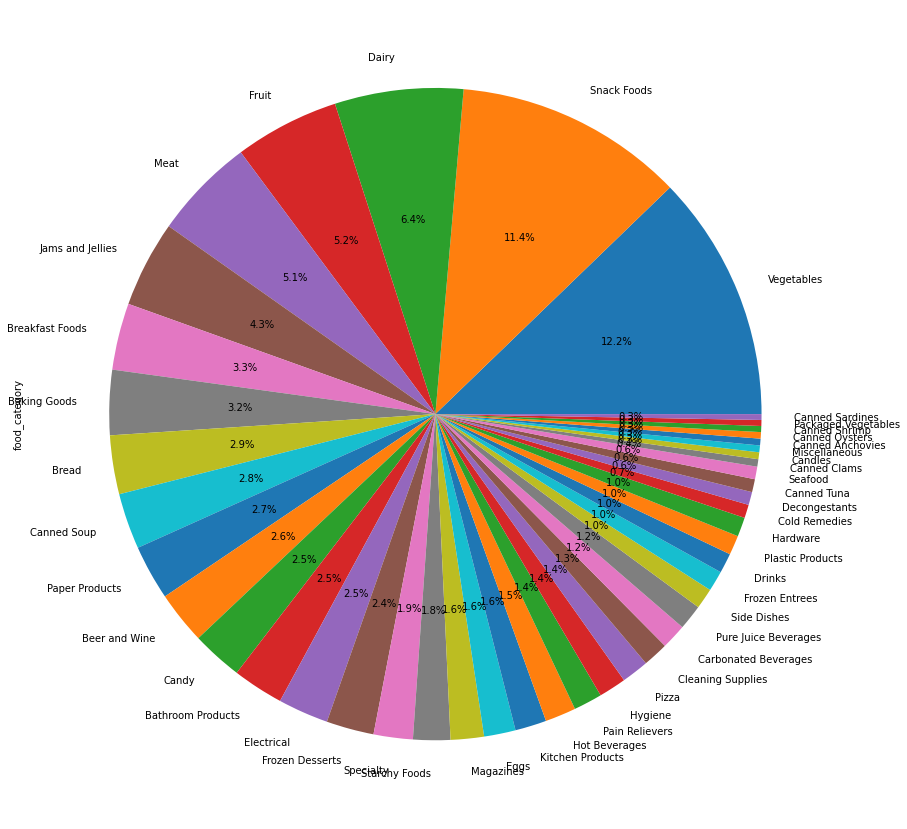

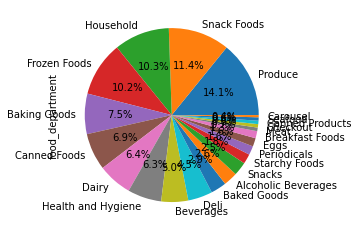

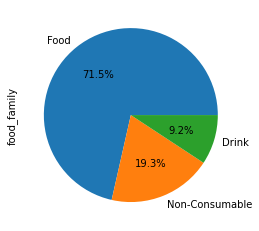

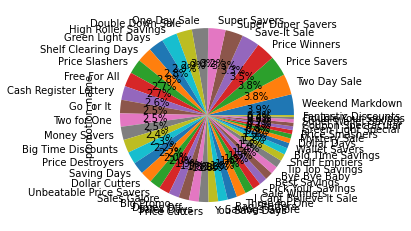

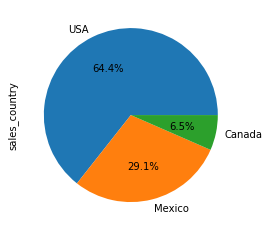

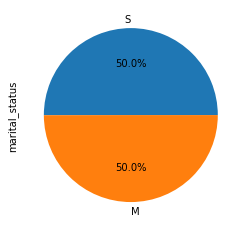

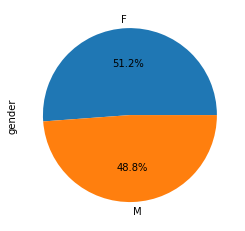

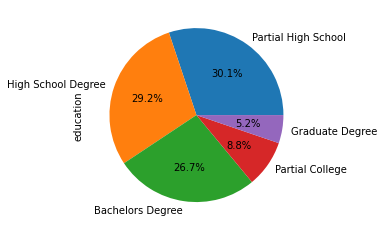

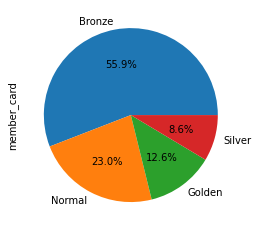

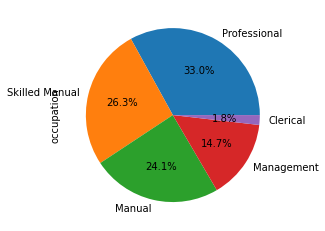

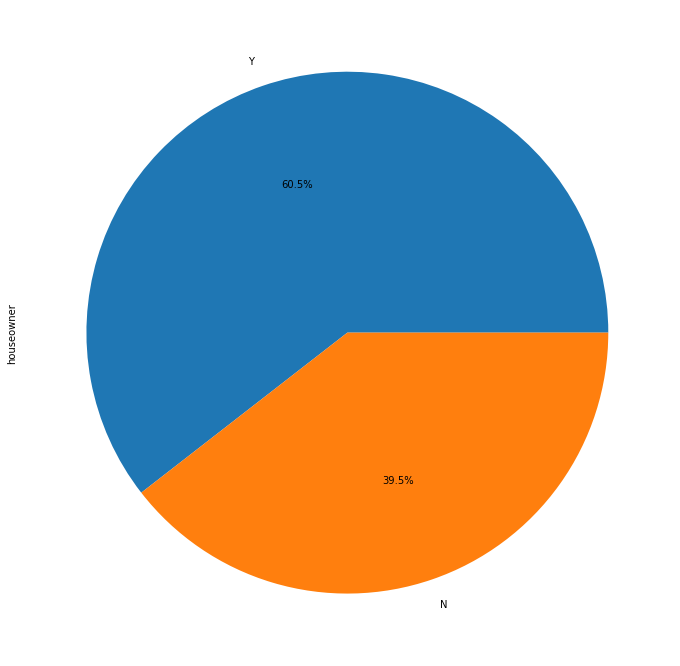

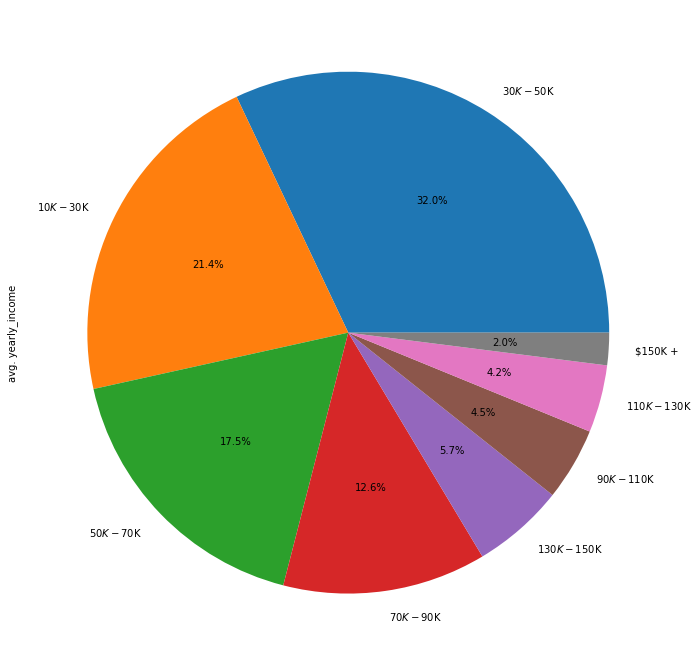

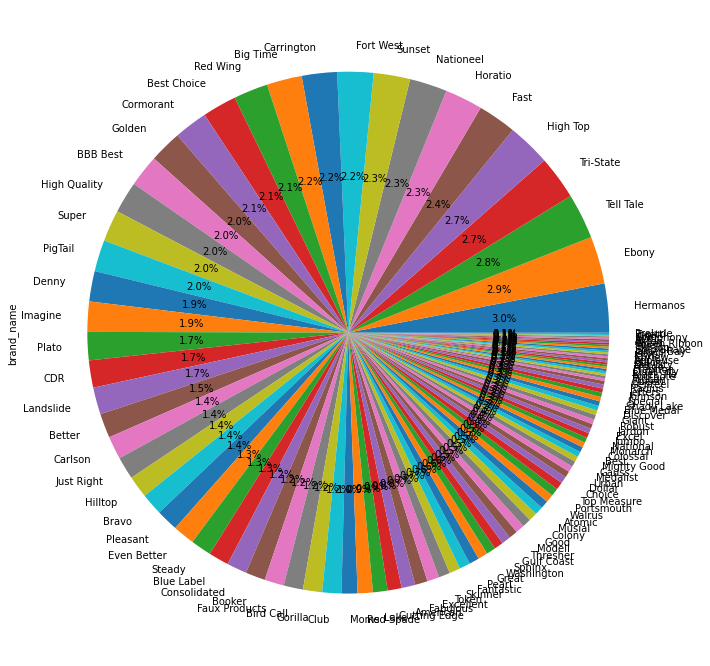

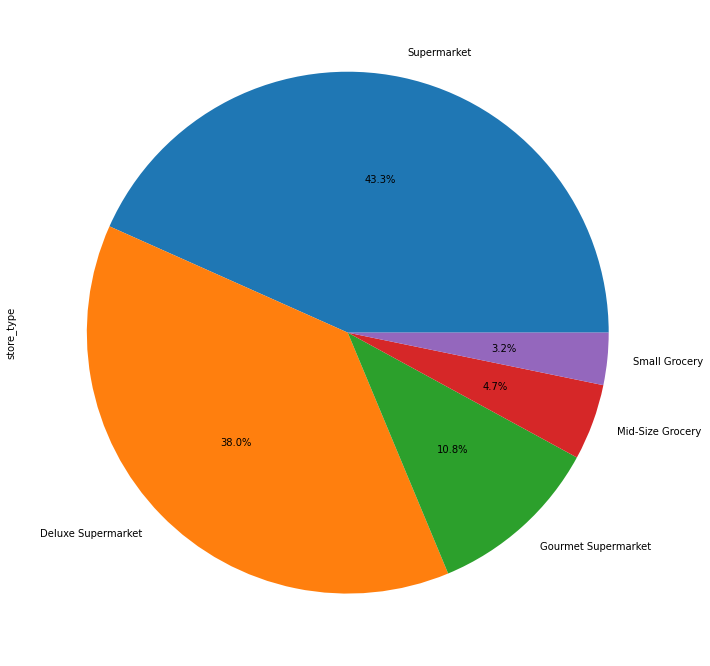

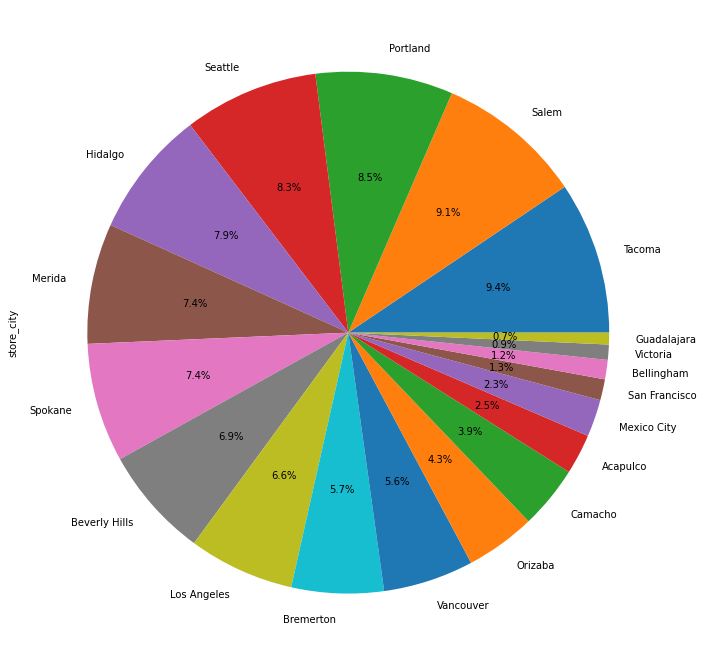

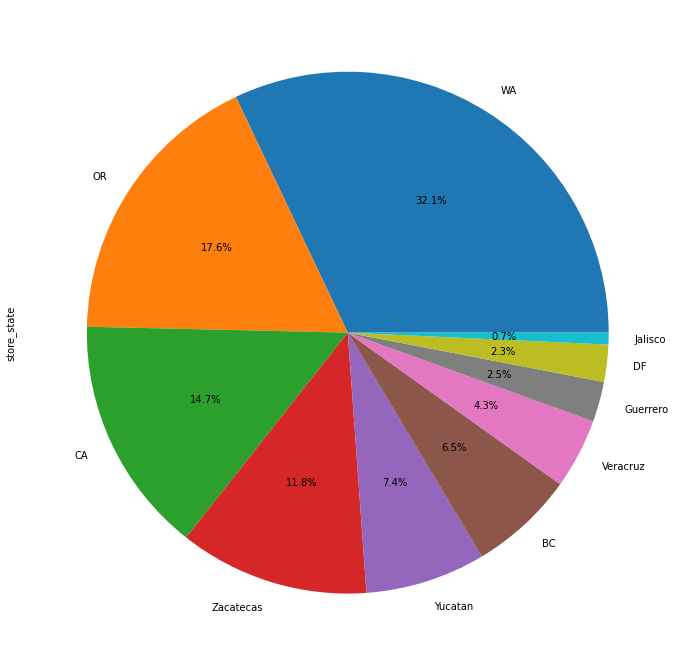

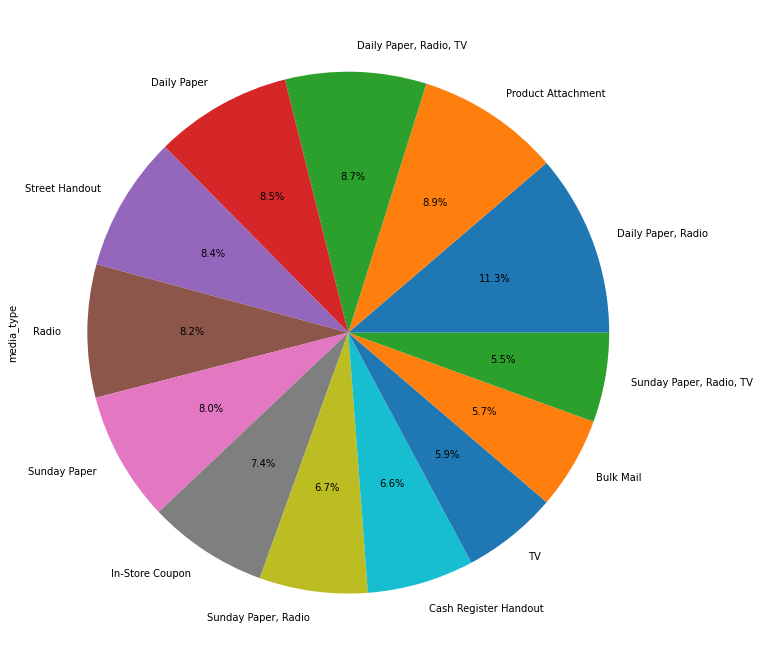

In [17]:
i = 1
plt.figure(figsize = (45,15))
for feature in categorical_features:
        if(i>10):
            plt.figure(figsize = (40,12))
        df[feature].value_counts().plot(kind='pie', autopct="%.1f%%")
        i +=1
        plt.show()

<h2><font color=#990000> Observations</font></h2>

<h4><font color=#FF0000>Univariate analysis for Continuous features:-</font></h4>

In [18]:
continuous_features = df.select_dtypes(include=[np.int64,np.float64])
print('continuous Column names: \n',list(continuous_features.columns), "\n\nNo.of Columns: ", len(continuous_features.columns))

continuous Column names: 
 ['row_id', 'store_sales(in millions)', 'store_cost(in millions)', 'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)', 'num_children_at_home', 'avg_cars_at home(approx).1', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'cost'] 

No.of Columns:  24


<h3 style="color: #66ccff"> Hist Plot and box plot </h3>

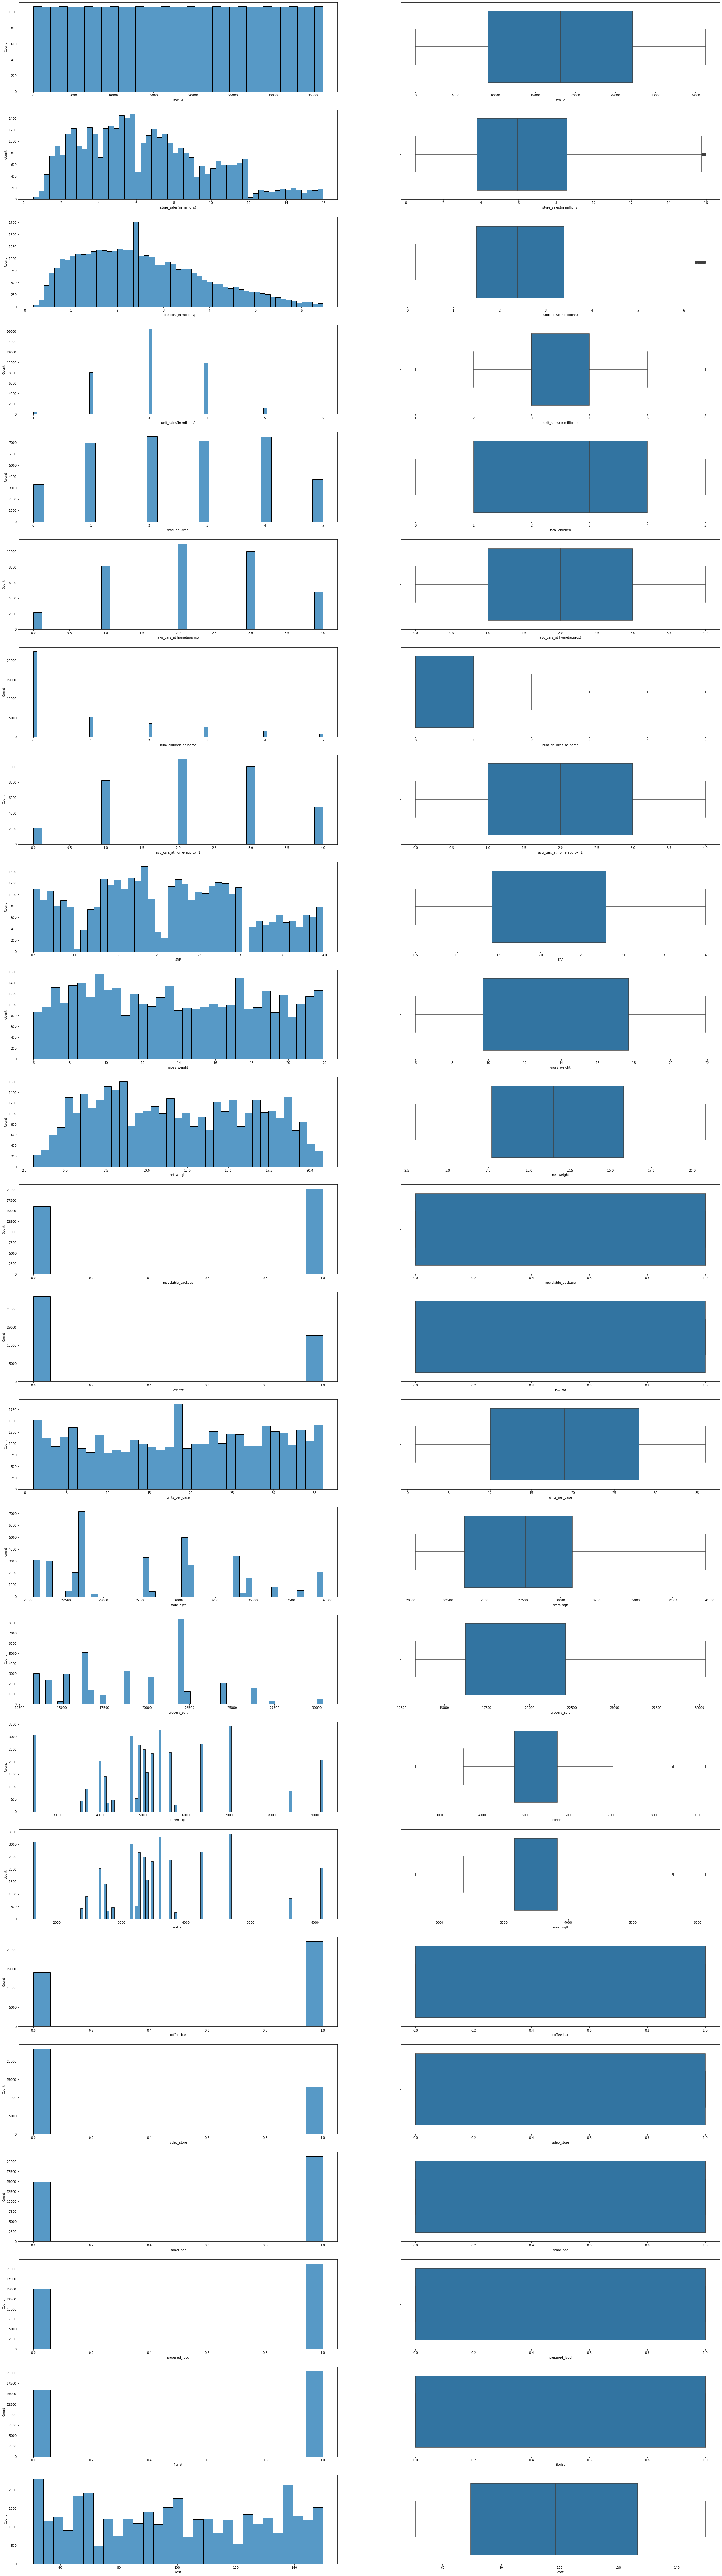

In [19]:
i = 1
plt.figure(figsize = (40,150))
for feature in continuous_features:
    plt.subplot(24,2,i)
    sns.histplot(data=df, x=df[feature])
    i +=1

    plt.subplot(24,2,i)
    sns.boxplot(data=df, x=df[feature])
    i +=1

<h2><font color=#990000> Observations</font></h2>

<h2><font color=#FF0000> Note</font></h2>

- This dataset consists of more than 48,000 article transactions. All the product are listed individually, like on a receipt. There are 40 columns in total, including informations about the store location, the facilities, the customers informations, and more. So we will start our analysis to get more in-depth findings from the dataset, we will try to do the analysis based on the common/ similar type of features .  


<h2 style="color: #66ccff">1:- Stores Location :</h2>

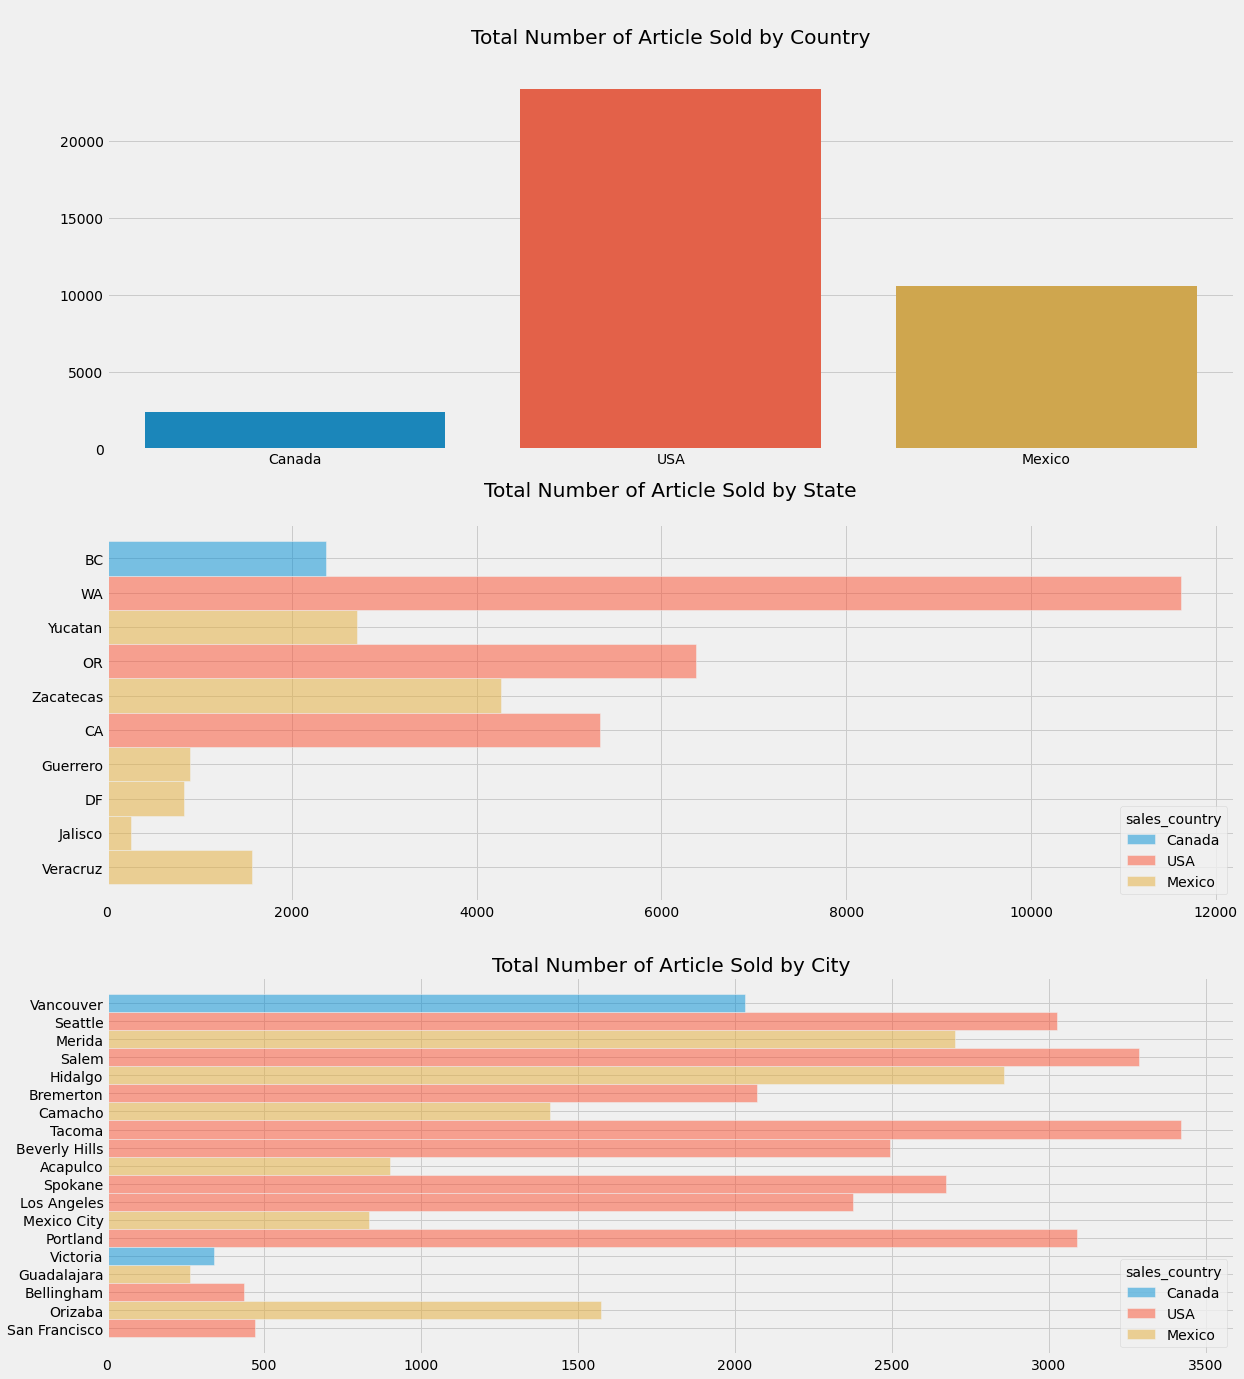

In [20]:
plt.style.use('fivethirtyeight')
_, ax = plt.subplots(3,1, figsize=(18,22))

sns.countplot(ax=ax[0], data=df, x='sales_country')
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title('\nTotal Number of Article Sold by Country\n')

sns.histplot(ax=ax[1], data=df, y='store_state', hue='sales_country')
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title('\nTotal Number of Article Sold by State\n')

sns.histplot(ax=ax[2], data=df, y='store_city', hue='sales_country')
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title('\nTotal Number of Article Sold by City')

plt.show()

<h2><font color=#990000> Observations based on Store Location </font></h2>

#### The data covers stores in ten states across America:
- 3 are in the United States
- 6 are in Mexico
- 1 in Canada

#### Their are a total of 19 cities in the data:
- 10 in the United States
- 7 in Mexico
- 2 in Canada

<h2 style="color: #66ccff">2:- Customers Demographics :</h2>

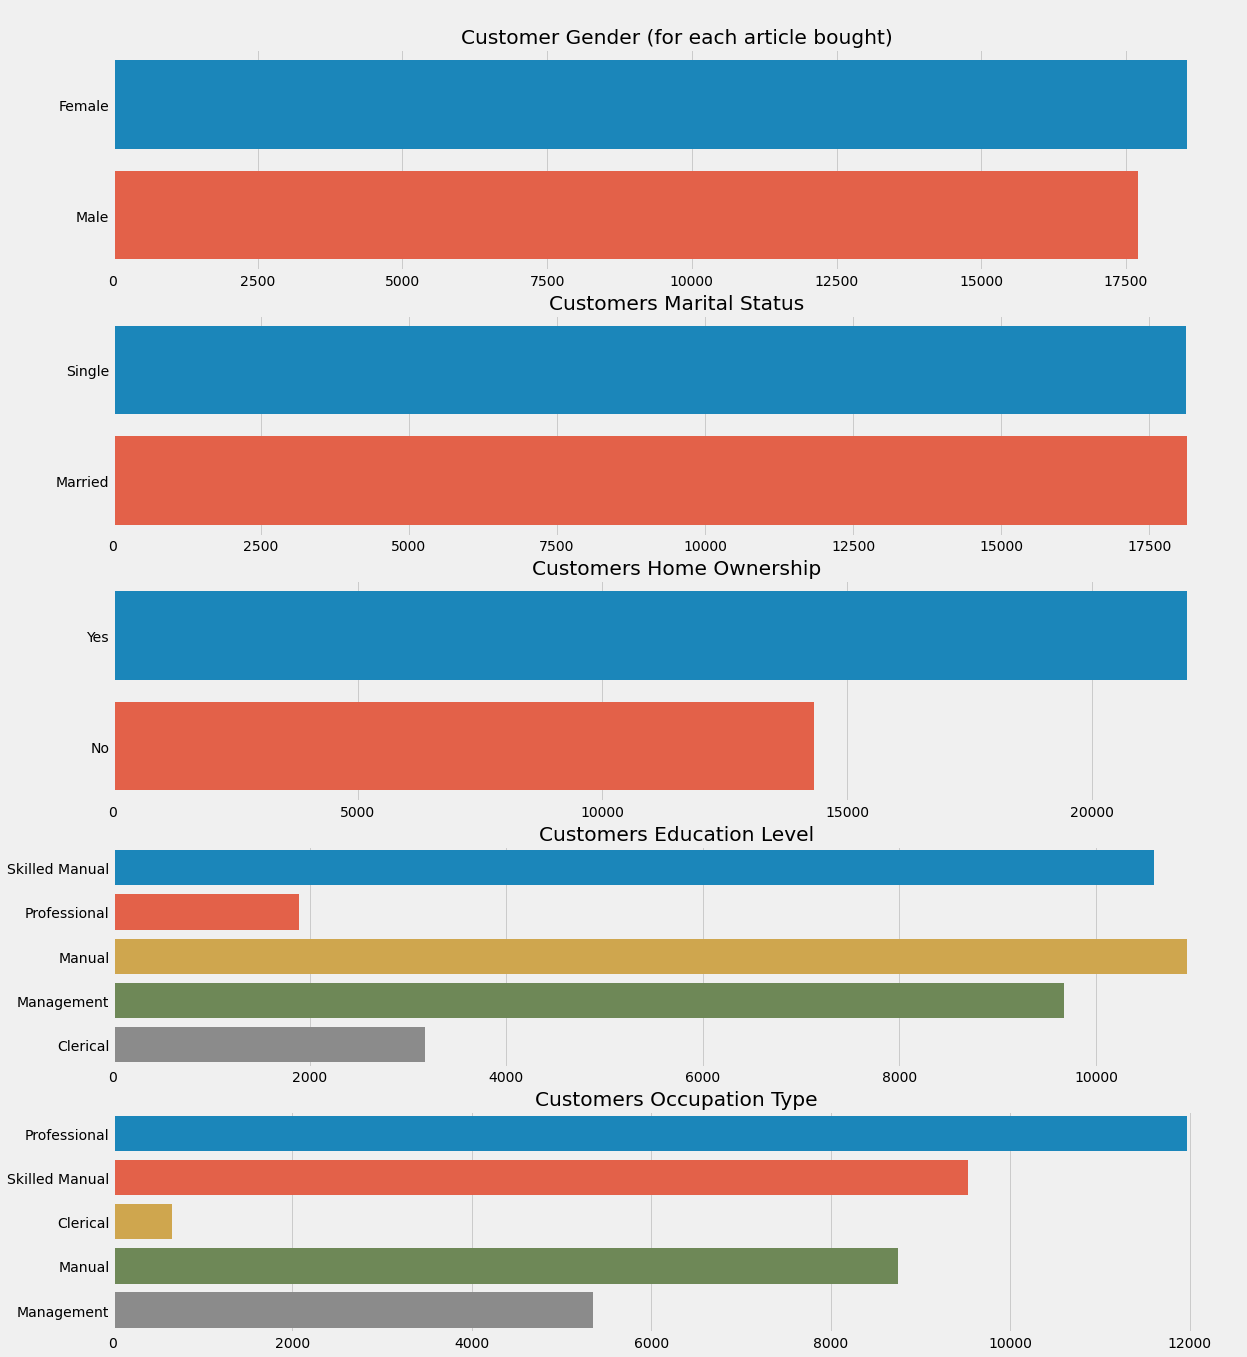

In [21]:
_, ax = plt.subplots(5,1, figsize=(18,22)) 

sns.countplot(ax=ax[0], data=df, y='gender')
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_yticks([1,0])
ax[0].set_yticklabels(labels=['Male', 'Female'])
ax[0].set_title('\nCustomer Gender (for each article bought)')

sns.countplot(ax=ax[1], data=df, y='marital_status')
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_yticks([1,0])
ax[1].set_yticklabels(labels=['Married', 'Single'])
ax[1].set_title('\nCustomers Marital Status')

sns.countplot(ax=ax[2], data=df, y='houseowner')
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_yticks([1,0])
ax[2].set_yticklabels(labels=['No', 'Yes'])
ax[2].set_title('\nCustomers Home Ownership')

sns.countplot(ax=ax[3],data=df, y='education')
ax[3].set_ylabel(None)
ax[3].set_xlabel(None)
ax[3].set_yticks([0,1,2,3,4])
ax[3].set_yticklabels(labels=['High School*', 'Bachelors','High School','Graduate', 'Bachelors*'])
ax[3].set_title('\nCustomers Education Level')

sns.countplot(ax=ax[4], data=df, y='occupation')
ax[4].set_ylabel(None)
ax[4].set_xlabel(None)
ax[4].set_yticks([0,1,2,3,4])
ax[3].set_yticklabels(labels=['Skilled Manual', 'Professional', 'Manual', 'Management', 'Clerical'])
ax[4].set_title('\nCustomers Occupation Type')

plt.show()

<h2><font color=#990000> Observations based on Customers Demographics </font></h2>

- There's a little more woman buying their groceries than men.

- The dataset is evenly splitted between married and single customers. However it is not indicated in which category the people who live together without getting married fall.

- A majority of the customers have high school level, customer starting university without graduating and with a bachelor are the second group. The people with a graduate degree are the rarest.

- Manual jobs are the most common, followed by professionnal jobs, and then management jobs. Clergy members are representing 1/60 of the transactions.

<h2 style="color: #66ccff">3:- Bought Items :</h2>

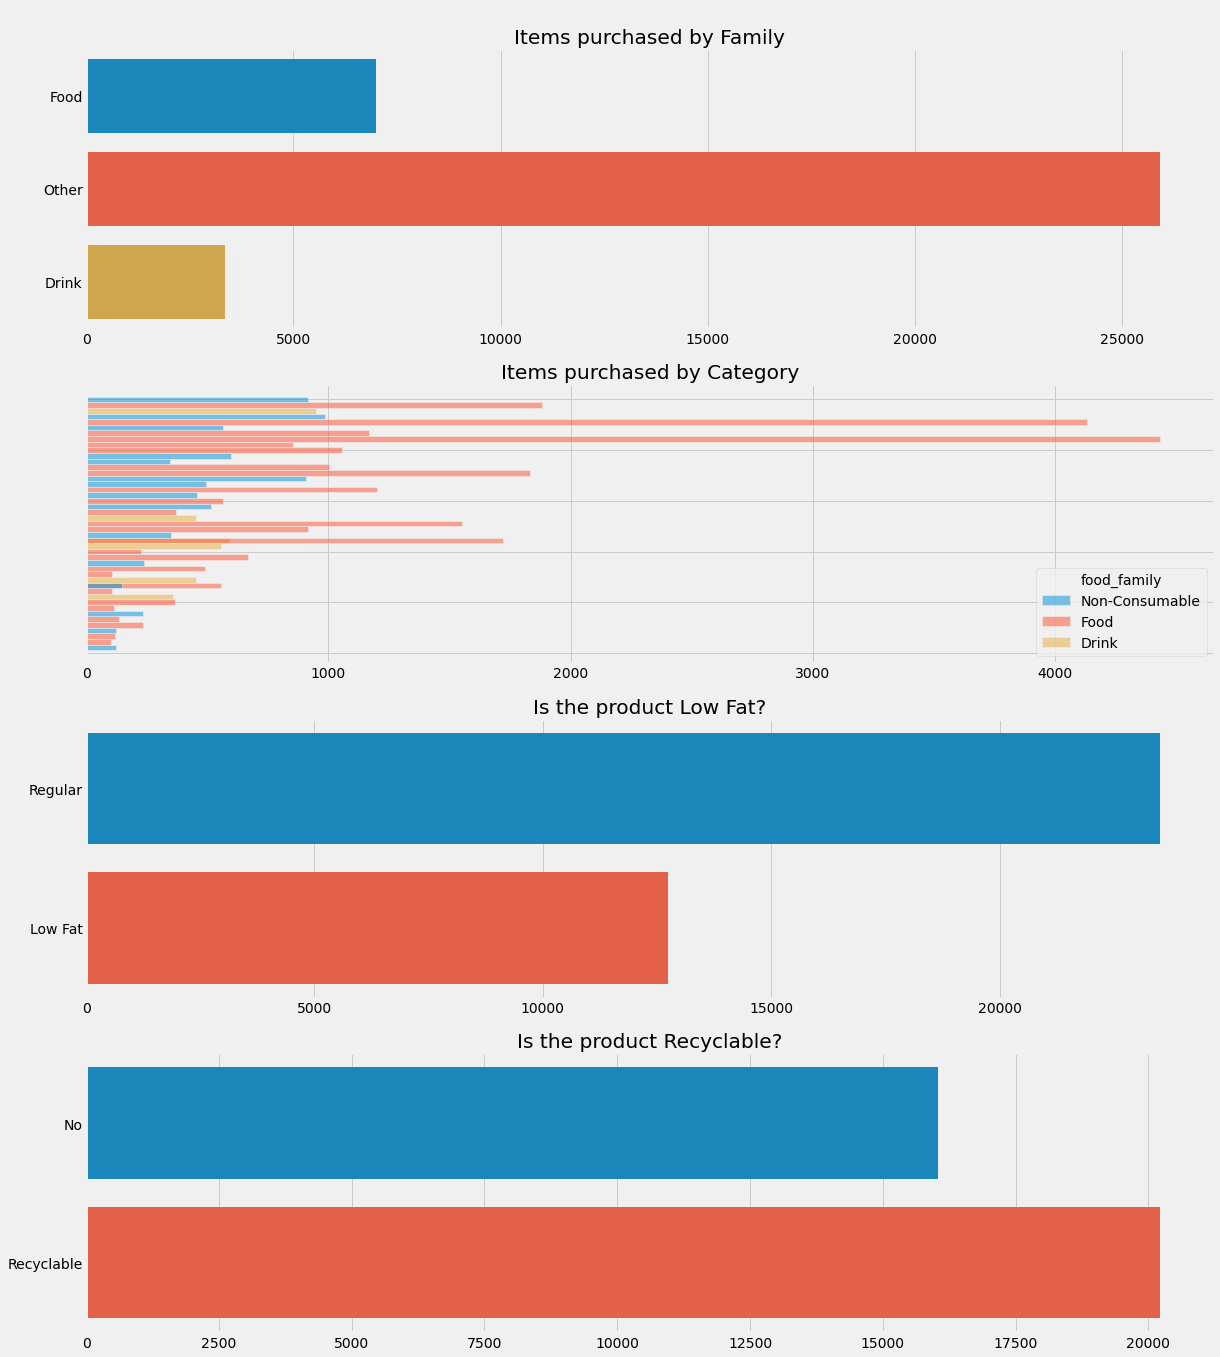

In [22]:
_, ax = plt.subplots(4,1, figsize=(18,22))

sns.countplot(ax=ax[0], data=df, y='food_family')
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_yticks([0,1,2])
ax[0].set_yticklabels(labels=['Food', 'Other', 'Drink'])
ax[0].set_title('\nItems purchased by Family')

sns.histplot(ax=ax[1], data=df, y='food_category', hue='food_family')
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_yticks([0,9,18,27,36,45], )
ax[1].set_yticklabels(labels=['','','','','',''])
ax[1].set_title('\nItems purchased by Category')

sns.countplot(ax=ax[2], data=df, y='low_fat')
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_yticks([0,1])
ax[2].set_yticklabels(labels=['Regular', 'Low Fat'])
ax[2].set_title('\nIs the product Low Fat?')

sns.countplot(ax=ax[3], data=df, y='recyclable_package')
ax[3].set_ylabel(None)
ax[3].set_xlabel(None)
ax[3].set_yticks([0,1])
ax[3].set_yticklabels(labels=['No', 'Recyclable'])
ax[3].set_title('\nIs the product Recyclable?')

plt.show()

<h2><font color=#990000> Observations based on Bought Items </font></h2>

- People coming to the supermaket mostly buy food. Drinks are only a small part of what they bought.
- A little over 12000 items sold are low fat. This is quite large since some product such as water or non-consumable cannot be low fat
- Most of the packages are recyclable, however there is a long way until non-recyclable package disappear. 

## **Feature selection**
CATEGORICAL VARIABLES:

Filtering USing Chi-Square- It is a is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.

In [23]:
def FilteringApproach(df):
    global drop_col_names,col_name
    catagorial = list(df.select_dtypes(include=[np.object]))
    for columnName in catagorial:
        data= pd.crosstab(df[columnName], df['cost'])
        p= chi2_contingency(data)[1]
        threshold = 0.05
        p_values_col[columnName]=p
        if p > threshold:
            df = df.drop(columns = columnName)
            drop_col_names.append(columnName)
        else:
            col_name.append(columnName)
            

    print("\nThe p-value for each non_catagorial column: \n", p_values_col)
    print("\nThe relationship confirms the alternative hypothesis: it is statistically significant ie <0.5")
    print("The column is kept because the p-value indicates the presence of a statistically significant relationship between column and the target column.", col_name)
    print("\nThe relationship between the column and target column is not found to be significant ie >0.5.")
    print("The columns should be removed as the p-value indicates that the relationship between the column and target column is not statistically significant",drop_col_names)
    return df
    
drop_col_names = []
col_name = []
p_values_col = {}
df = FilteringApproach(df)


The p-value for each non_catagorial column: 
 {'food_category': 0.5193090037766898, 'food_department': 0.7215142176338958, 'food_family': 0.8693896005944094, 'promotion_name': 0.0, 'sales_country': 0.0, 'marital_status': 1.2637506670640213e-108, 'gender': 6.820114054262253e-136, 'education': 0.0, 'member_card': 0.0, 'occupation': 0.0, 'houseowner': 2.8665210783507427e-121, 'avg. yearly_income': 0.0, 'brand_name': 0.9713097768877914, 'store_type': 0.0, 'store_city': 0.0, 'store_state': 0.0, 'media_type': 0.0}

The relationship confirms the alternative hypothesis: it is statistically significant ie <0.5
The column is kept because the p-value indicates the presence of a statistically significant relationship between column and the target column. ['promotion_name', 'sales_country', 'marital_status', 'gender', 'education', 'member_card', 'occupation', 'houseowner', 'avg. yearly_income', 'store_type', 'store_city', 'store_state', 'media_type']

The relationship between the column and target

<h2><font color=#990000> Observations</font></h2>

now we are dropping two columns nalmely 
- row_id :- It ia unique indenfier </br>
- avg_cars_at home(approx).1 :- This is the redunant column of "avg_cars_at home(approx)" column

In [24]:
df = df.drop(columns= ['row_id','avg_cars_at home(approx).1'])
df.shape

(36256, 35)

## <h4 style="color: #66ccff"> Outlier detection for Continuous numeric variables </h4>

In [25]:
continuous_features = df.select_dtypes(include=[np.int64,np.float64])
print('continuous Column names: \n',list(continuous_features.columns), "\n\nNo.of Columns: ", len(continuous_features.columns))

continuous Column names: 
 ['store_sales(in millions)', 'store_cost(in millions)', 'unit_sales(in millions)', 'total_children', 'avg_cars_at home(approx)', 'num_children_at_home', 'SRP', 'gross_weight', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case', 'store_sqft', 'grocery_sqft', 'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'cost'] 

No.of Columns:  22


### **Generating Normal Distribution, removing skewness**
The distribution of skewness values is as below:

- Skewness = 0 when the distribution is normal.
- Skewness > 0 or positive when more weight is on the left side of the distribution.
-- (Right Skewed: Apply Log Transform)
- Skewness < 0 or negative when more weight is on the right side of the distribution.
-- (Left Skewed: Apply Square Transformation)

In [26]:
def outliers_percentage(df,continuous_features):
    No_outliers_col = []
    delete_col = []
    for col_name in continuous_features:
        skew_val = df[[col_name]].skew().values[0] 
        print("checking the skewness before transformation\033[1;34;5;124m",col_name,"\033[0m: \033[1m%.2f"%skew_val,"\033[0m")
        if skew_val > 1 and col_name != 'num_children_at_home':
            df[col_name]= np.log1p(df[col_name])
            No_outliers_col.append(col_name)
        elif skew_val > 0.5 and col_name != 'Total Accounts':
            df[col_name]= np.sqrt(df[col_name])
            No_outliers_col.append(col_name)
    print('\n')
    for col_name in No_outliers_col:
        skew_val = df[[col_name]].skew().values[0] 
        print("checking the skewness after transformation\033[1;34;5;124m",col_name,"\033[0m: \033[1m%.2f"%skew_val,"\033[0m")
    
    return No_outliers_col

No_outliers_col = outliers_percentage(df,continuous_features)
print(No_outliers_col)

checking the skewness before transformation store_sales(in millions) : 0.58 
checking the skewness before transformation store_cost(in millions) : 0.59 
checking the skewness before transformation unit_sales(in millions) : 0.05 
checking the skewness before transformation total_children : -0.02 
checking the skewness before transformation avg_cars_at home(approx) : -0.07 
checking the skewness before transformation num_children_at_home : 1.54 
checking the skewness before transformation SRP : 0.14 
checking the skewness before transformation gross_weight : 0.10 
checking the skewness before transformation net_weight : 0.11 
checking the skewness before transformation recyclable_package : -0.23 
checking the skewness before transformation low_fat : 0.62 
checking the skewness before transformation units_per_case : -0.09 
checking the skewness before transformation store_sqft : 0.39 
checking the skewness before transformation grocery_sqft : 0.39 
checking the skewness before transformat

<h2 style="color: #66ccff">Multivariate Analysis :</h2>

In [27]:
fig=px.scatter_3d(df,x='store_cost(in millions)',y='store_sales(in millions)',z='cost',color='sales_country',template='plotly_dark')
fig.show()

## **Pearson’s Correlation:**
It is used as a measure for quantifying linear dependence between two continuous variables X and Y.
We'll plot the correlations using a Heat Map.

We use RdBu as a color scheme, but you can use viridis, Blues, YlGnBu or many others.

We set the range from -1 to 1, as it is the range of the Pearson Correlation. 

Otherwise the function infers the boundaries from the input.

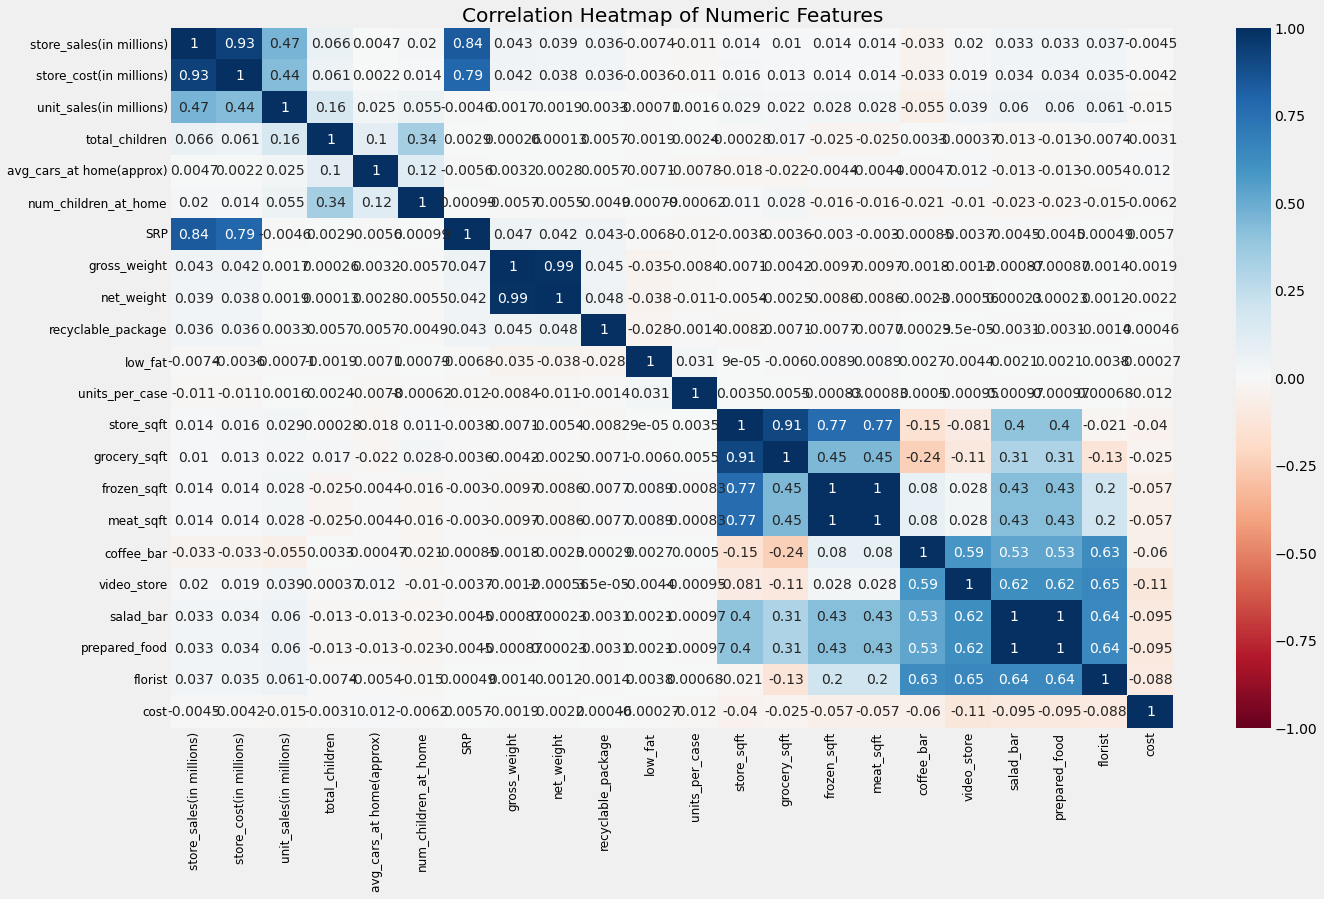

In [28]:
plt.figure(figsize = (20,12))
s = sns.heatmap(df.corr(),
               annot = True, 
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

<h2><font color=#990000> Observations</font></h2>

#### I choose the thresholds with 0.8 and -0.8 so features that greater than 0.8 or lesser than -0.8 are considered as strong positive correlation and strong negative correlation respectively

As the charts shows, we can observe the following things 

- **"prepared_food"** and **"salad_bar"** have strong positive relationship (they have 1 for correlation point)
- **"meat_sqft"** and **"frozen_sqft"** have strong positive relationship (they have 1 for correlation point)
- **"net_weight"** and **"gross_weight"** have strong positive relationship (they have  0.99 for correlation point)
- **"store_sales"** and **"store_cost"** have strong positive relationship(they have 0.93 for correlation point)
- **"grocery_sqft"** and **"store_sqft"** have strong positive relationship(they have 0.91 for correlation point) 
- **"SRP"** has high correlation with **"store_sales"** and **"store_cost"** for 0.84 and 0.79 respectivvely

#### meat_sqft                    -0.048254
#### frozen_sqft                  -0.048262
#### ---------------------------------------------------
##### salad_bar                    -0.094774
##### prepared_food                -0.094774
#### ---------------------------------------------------
##### SRP                           0.005738
##### store_cost(in millions)       0.000141
##### store_sales(in millions)     -0.001083
#### ---------------------------------------------------
##### gross_weight                 -0.001853
##### net_weight                   -0.002197
#### ---------------------------------------------------
#### grocery_sqft                 -0.025498
#### store_sqft                   -0.040066




####   In conclusion, based on above analysis i chose to the remove following featues,
1. "salad_bar",
2. "meat_sqft",
3. "gross_weight", 
4. "store_sales", 
5. "store_cost", 
6. "store_sqft"

In [29]:
df = df.drop(columns=['meat_sqft', 'salad_bar','gross_weight',
                          'store_sales(in millions)', 'store_cost(in millions)', 'store_sqft'])
df.shape

(36256, 29)

In [30]:
df["media_type"].unique()

array(['Cash Register Handout', 'Radio', 'Product Attachment',
       'Daily Paper, Radio, TV', 'Street Handout', 'In-Store Coupon',
       'Daily Paper, Radio', 'Sunday Paper', 'Sunday Paper, Radio',
       'Daily Paper', 'Bulk Mail', 'Sunday Paper, Radio, TV', 'TV'],
      dtype=object)

# Treating object features in Training dataset

<h2><font color=#990000> Observations</font></h2>

- As we can clearly see from the unique values of the media type column that some of the values are repeating and have mixed up data into a single vlaue. Like (TV, Radio, Daily Paper, Sunday Paper) multiple individual values have mixed up together to form a single value of media type.
- So we will be segregating all unique values and creating a new column in the dataset

In [31]:
temp=df["media_type"].value_counts()
media_types=temp.index.to_numpy()
new_media_types=[]
for m in media_types:
    x=m.split(",")
    for i in x:
        i.lstrip()
        print(i.lstrip())
        new_media_types.append(i.lstrip())

Daily Paper
Radio
Product Attachment
Daily Paper
Radio
TV
Daily Paper
Street Handout
Radio
Sunday Paper
In-Store Coupon
Sunday Paper
Radio
Cash Register Handout
TV
Bulk Mail
Sunday Paper
Radio
TV


In [32]:
media_list=list(set(new_media_types))
df[media_list]=np.zeros(9,dtype = int)

for media in media_list:
    print(media)
    df[media]=df["media_type"].apply(lambda x: 1 if media in x else 0 )

Street Handout
Sunday Paper
Radio
Cash Register Handout
Product Attachment
TV
Daily Paper
In-Store Coupon
Bulk Mail


In [33]:
df = df.drop(columns=['media_type'])

In [34]:
df["avg. yearly_income"].value_counts(dropna=False)

$30K - $50K      11616
$10K - $30K       7769
$50K - $70K       6354
$70K - $90K       4568
$130K - $150K     2073
$90K - $110K      1633
$110K - $130K     1516
$150K +            727
Name: avg. yearly_income, dtype: int64

4 different patterns for the values in the column:

- X to Y — an example is $30K to $50K.
We can convert this to a numeric value by extracting the numbers and averaging them.
- NaN
We’ll preserve NaN values, and not convert them at all.
- X+ — an example is $150K +.
We can convert this to a numeric value by extracting the number.

In [35]:
def clean_income(value):
    if value == "$150K +":
        return 150000
    elif value == "Prefer not to answer":
        return np.nan
    elif isinstance(value, float) and math.isnan(value):
        return np.nan
    value = value.replace("K","").replace('$','')

    income_high, income_low = value.split(" - ")
    return (int(income_high) + int(income_low)) / 2

In [36]:
df["Avg income"] = df["avg. yearly_income"].apply(clean_income)
df = df.drop(columns=['avg. yearly_income'])

In [37]:
df.value_counts('store_type') 

store_type
Supermarket            15707
Deluxe Supermarket     13764
Gourmet Supermarket     3906
Mid-Size Grocery        1709
Small Grocery           1170
dtype: int64

In [38]:
df.value_counts('member_card')

member_card
Bronze    20260
Normal     8330
Golden     4554
Silver     3112
dtype: int64

Since member_card, store type are nominal data, replacing them with numbers

In [39]:
# from sklearn.preprocessing import OrdinalEncoder
# oe = OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])
# oe.fit(X_train)

In [40]:
# oe = OrdinalEncoder()
# df[["Sex","Blood", "Study"]] = enc.fit_transform(df[["Sex","Blood", "Study"]])

In [41]:
df.store_type[df.store_type=='Small Grocery']=0
df.store_type[df.store_type=='Mid-Size Grocery']=0.2
df.store_type[df.store_type=='Supermarket']=0.4
df.store_type[df.store_type=='Gourmet Supermarket']=0.6
df.store_type[df.store_type=='Deluxe Supermarket']=0.8

In [42]:
df.member_card[df.member_card=='Normal']=0
df.member_card[df.member_card=='Bronze']=0.33
df.member_card[df.member_card=='Silver']=0.66
df.member_card[df.member_card=='Golden']=1

In [43]:
df.value_counts('store_type')

store_type
0.4    15707
0.8    13764
0.6     3906
0.2     1709
0.0     1170
dtype: int64

In [44]:
df.value_counts('member_card')

member_card
0.33    20260
0.00     8330
1.00     4554
0.66     3112
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36256 entries, 0 to 36255
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   unit_sales(in millions)   36256 non-null  int64  
 1   promotion_name            36256 non-null  object 
 2   sales_country             36256 non-null  object 
 3   marital_status            36256 non-null  object 
 4   gender                    36256 non-null  object 
 5   total_children            36256 non-null  int64  
 6   education                 36256 non-null  object 
 7   member_card               36256 non-null  object 
 8   occupation                36256 non-null  object 
 9   houseowner                36256 non-null  object 
 10  avg_cars_at home(approx)  36256 non-null  int64  
 11  num_children_at_home      36256 non-null  float64
 12  SRP                       36256 non-null  float64
 13  net_weight                36256 non-null  float64
 14  recycl

In [46]:
df['member_card'] = df['member_card'].astype('float')
df['store_type'] = df['store_type'].astype('float')
df['Avg income'] = df['Avg income'].astype('float')

## All the features that having less subcategories <10, using One-Hot Encoding for them to avoid bulking the dataset

In [47]:
df=pd.get_dummies(df,columns=\
['sales_country','marital_status','gender','education','occupation','houseowner','store_state'],drop_first=True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36256 entries, 0 to 36255
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unit_sales(in millions)        36256 non-null  int64  
 1   promotion_name                 36256 non-null  object 
 2   total_children                 36256 non-null  int64  
 3   member_card                    36256 non-null  float64
 4   avg_cars_at home(approx)       36256 non-null  int64  
 5   num_children_at_home           36256 non-null  float64
 6   SRP                            36256 non-null  float64
 7   net_weight                     36256 non-null  float64
 8   recyclable_package             36256 non-null  int64  
 9   low_fat                        36256 non-null  float64
 10  units_per_case                 36256 non-null  int64  
 11  store_type                     36256 non-null  float64
 12  store_city                     36256 non-null 

using Label Encoding for rest columns with >10 subcategories </h4>

In [49]:
from sklearn import preprocessing  
# label_encoder object knows how to understand word labels. 
le = preprocessing.LabelEncoder()
# Encode labels 
# df['food_category']= le.fit_transform(df['food_category'])
# df['food_department']= le.fit_transform(df['food_department'])
# df['brand_name']= le.fit_transform(df['brand_name'])
df['store_city']= le.fit_transform(df['store_city'])
df['promotion_name']= le.fit_transform(df['promotion_name'])
#df['media_type']= le.fit_transform(df['media_type'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36256 entries, 0 to 36255
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   unit_sales(in millions)        36256 non-null  int64  
 1   promotion_name                 36256 non-null  int64  
 2   total_children                 36256 non-null  int64  
 3   member_card                    36256 non-null  float64
 4   avg_cars_at home(approx)       36256 non-null  int64  
 5   num_children_at_home           36256 non-null  float64
 6   SRP                            36256 non-null  float64
 7   net_weight                     36256 non-null  float64
 8   recyclable_package             36256 non-null  int64  
 9   low_fat                        36256 non-null  float64
 10  units_per_case                 36256 non-null  int64  
 11  store_type                     36256 non-null  float64
 12  store_city                     36256 non-null 

In [51]:
# def encodeCategorialValues(df):
#     global col_names_values
#     non_catagorial = list(df.select_dtypes(include=[np.object]))
#     for columnName in non_catagorial:
#         unique_val = len(df[columnName].unique())
#         value = np.sort(df[columnName].unique())
#         col_names_values[columnName] = list(value)
#         lst = list(value)
#         test_dict = dict()
#         for i in value:
#             test_dict[i] = lst.index(i)
#         df[columnName] = df[columnName].map(test_dict)
#     return df
# col_names_values = dict()
# encodeCategorialValues(df)
# print(col_names_values)
# df.sample(n=5)

In [52]:
checkkkkk

NameError: ignored

In [ ]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our 'for' loop runs 10 iterations.
# In addition we run the algortihm at many different points to find the best starting pts - k means plus plus. 
# And we set a random state for reproducibility.
# Within cluster sum of sqaures(WCSS) is a list we have taken
# wcss = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(segmentation_std)
#     wcss.append(kmeans.inertia_)

### ${\textbf{Results}}$

In [ ]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
# df_segm_kmeans = df.copy()
# df_segm_kmeans['Segment K-means'] = kmeans.labels_

Segment-0 got 0 coffee bars, Segment-1 got 0.5, Segment-2 got 1
Segment-2 got 1 videostore


In [ ]:
# Compute the size and proportions of the 3 clusters
# df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means','cost']].groupby(['Segment K-means']).count()
# df_segm_analysis['Proportion of Obs'] = df_segm_analysis['N Obs'] / df_segm_analysis['N Obs'].sum()

In [ ]:
# pd.set_option('display.max_columns',None)
# df_segm_analysis

In [ ]:
# df_segm_kmeans.shape

In [ ]:
# df_segm_kmeans['Labels']=df_segm_kmeans['Segment K-means'].map({0:'0',1:'1',2:'2'})

In [ ]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
# y_axis = df_segm_kmeans['unit_sales(in millions)']
# x_axis = df_segm_kmeans['Avg income']
# plt.figure(figsize = (10, 8))
# sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c'])
# plt.title('Segmentation K-means')
# plt.show()

### ${\textbf{PCA}}$

In [ ]:
# # Employ PCA to find a subset of components, which explain the variance in the data.
# pca = PCA()
# # Fit PCA with our standardized data.
# pca.fit(segmentation_std)
# # The attribute shows how much variance is explained by each of the seven individual components.
# pca.explained_variance_ratio_

In [ ]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
# plt.figure(figsize = (12,9))
# plt.plot(range(1,53), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
# plt.title('Explained Variance by Components')
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')

In [ ]:
# # We choose three components. 30-40 seems the right choice according to the previous graph.
# pca = PCA(n_components = 32)

In [ ]:
# #Fit the model the our data with the selected number of components. In our case three.
# pca.fit(segmentation_std)

In [ ]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features. 
# pca.components_

In [ ]:
# df_pca_comp = pd.DataFrame(data = pca.components_,
#                            columns = df_segm_kmeans.columns.values)
# df_pca_comp

### ${\textbf{PCA Results}}$

In [ ]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
# sns.heatmap(df_pca_comp,
#             vmin = -1, 
#             vmax = 1,
#             cmap = 'RdBu',
#             annot = True)
# plt.yticks([0, 1, 2], 
#            ['Component 1', 'Component 2', 'Component 3'],
#            rotation = 45,
#            fontsize = 9)

In [ ]:
# pca.transform(segmentation_std)

In [ ]:
# scores_pca = pca.transform(segmentation_std)

#**Data Preparation for model building:** 

In [53]:
Y = df["cost"]
X = df.drop(columns='cost')

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', Y_train.shape)
print('Shape of testing label:', Y_test.shape)

Shape of training feature: (29004, 51)
Shape of testing feature: (7252, 51)
Shape of training label: (29004,)
Shape of testing label: (7252,)


### Standardizing data,
So that all features have equal weight. This is important for modelling.
 Otherwise, in our case Income would be considered much more important than Education for Instance. 

 We do not know if this is the case, so we would not like to introduce it to our model. 
This is what is also refered to as bias.

In [ ]:
# sc = StandardScaler()
# segmentation_std = sc.fit_transform(df)
# here we are just transforming training data for interpretation and understanding hidden features

## ${\textbf{Hierarchical Clustering}}$

In [ ]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix, WArd performs Heirarchical clustering
# Results are stored in form of linkage matrix

# hier_clust = linkage(segmentation_std, method = 'ward')

In [ ]:
# We plot the results from the Hierarchical Clustering using a Dendrogram. 
# We truncate the dendrogram for better readability. The level p shows only the last p merged clusters
# We also omit showing the labels for each point.
# plt.figure(figsize = (18,9))
# plt.title('Hierarchical Clustering Dendrogram')
# plt.xlabel('Observations')
# plt.ylabel('Distance')
# dendrogram(hier_clust,
#            truncate_mode = 'level', 
#            p = 7, 
#            show_leaf_counts = False, 
#            no_labels = True)
# plt.show()

## We have roughly gotten 3 main clusteres in our data.
# Lets verify again using Flat clustering


## ${\textbf{K-means Clustering}}$

In [ ]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our 'for' loop runs 10 iterations.
# In addition we run the algortihm at many different points to find the best starting pts - k means plus plus. 
# And we set a random state for reproducibility.
# Within cluster sum of sqaures(WCSS) is a list we have taken
# wcss = []
# for i in range(1,11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
#     kmeans.fit(segmentation_std)
#     wcss.append(kmeans.inertia_)
    
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
# plt.figure(figsize = (10,8))
# plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
# plt.xlabel('Number of Clusters')
# plt.ylabel('WCSS')
# plt.title('K-means Clustering')
# plt.show()

In [ ]:
# We run K-means with a fixed number of clusters. In our case 3.
# kmeans = KMeans(n_clusters =3, init = 'k-means++', random_state = 42)
# # # We divide our data into the 3 clusters.
# kmeans.fit(segmentation_std)

In [ ]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
# df_segm_kmeans = df.copy()
# df_segm_kmeans['Segment K-means'] = kmeans.labels_

# # Calculate mean values for the clusters
# df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
# df_segm_analysis

# pd.set_option('display.max_columns',None)
# df_segm_analysis


Segment-0 got 0 coffee bars,

Segment-1 got 0.5,

Segment-2 got 1

Segment-2 got 1 videostore

But still No extraordinary clusters can be seen from our process and no great insights are delivered.

So we will continue with model building without new inferences from the clusters formed

### ${\textbf{Using ColumnTransformer for encoding variables:}}$
- Encoding the categorical data using Label Encoding for rest columns with >10 subcategories
- All the features that having less subcategories <10, using One-Hot Encoding for them to avoid bulking the dataset


In [ ]:
# from sklearn.compose import ColumnTransformer
# # passing transformers in form of tuples
# transformer = ColumnTransformer(transformers=[
#     ('tnf1',OrdinalEncoder(categories=[['Small Grocery','Mid-Size Grocery','Supermarket','Gourmet Supermarket','Deluxe Supermarket'],['Normal','Bronze','Silver','Golden']]),['store_type','member_card']),
#     ('tnf2',OneHotEncoder(sparse=False,drop='first'),['sales_country','marital_status','gender','education','occupation','houseowner','store_state'])
# ],remainder='passthrough')

In [ ]:
# transformer.fit_transform(X_train).shape

In [ ]:
# transformer.transform(X_test).shape

In [ ]:
# X_train.info()

In [55]:
## Feature Scaling
sc = StandardScaler()
# fit_transform() method first trains the Scaler on dataset and then transforms it between 0 and 1
X_train = sc.fit_transform(X_train)
# transform() method only transforms the dataset based on what it has learnt on the dataset before
X_test = sc.transform(X_test)

In [ ]:
# after scaling a numpy array is formed so converting it back to dataframe
# X_train=pd.DataFrame(X_train)
# X_test=pd.DataFrame(X_test)
# np.round(X_train.describe(),1)

<h2><font color=orange>Selecting K-Best Features</font></h2>

<h3 style="color: #66ccff">Method 1 (Feature importance from coefficients) </h3>

In [56]:
df=df.drop(columns='cost')
df1=df.copy()

In [57]:
df1.columns

Index(['unit_sales(in millions)', 'promotion_name', 'total_children',
       'member_card', 'avg_cars_at home(approx)', 'num_children_at_home',
       'SRP', 'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'grocery_sqft', 'frozen_sqft', 'coffee_bar',
       'video_store', 'prepared_food', 'florist', 'Street Handout',
       'Sunday Paper', 'Radio', 'Cash Register Handout', 'Product Attachment',
       'TV', 'Daily Paper', 'In-Store Coupon', 'Bulk Mail', 'Avg income',
       'sales_country_Mexico', 'sales_country_USA', 'marital_status_S',
       'gender_M', 'education_Graduate Degree', 'education_High School Degree',
       'education_Partial College', 'education_Partial High School',
       'occupation_Management', 'occupation_Manual', 'occupation_Professional',
       'occupation_Skilled Manual', 'houseowner_Y', 'store_state_CA',
       'store_state_DF', 'store_state_Guerrero', 'store_state_Jalisco',
       'store_state_OR', 'store_s

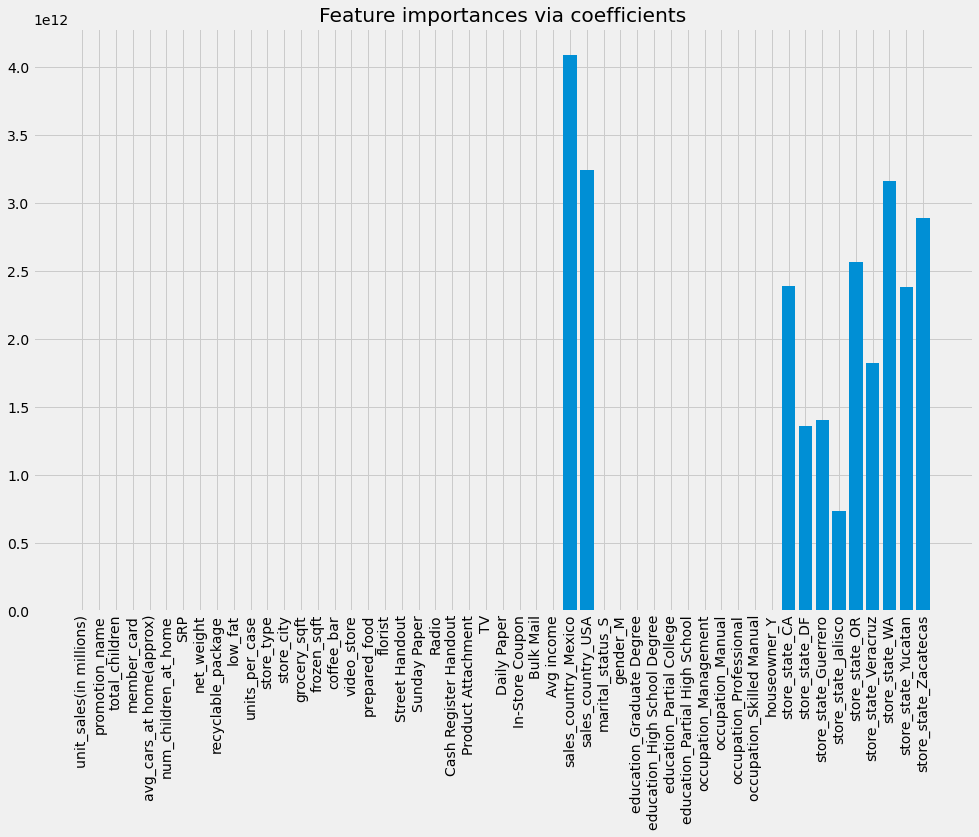

In [58]:
linear_reg = LinearRegression().fit(X_train, Y_train)
importance = np.abs(linear_reg.coef_)
feature_names = np.array(df1.columns)
plt.figure(figsize=(15, 10))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.xticks(rotation = 90)
plt.show()

In [59]:
threshold = np.sort(importance)[-10] + 0.01
sfm = SelectFromModel(linear_reg, threshold=threshold).fit(X_train, Y_train)
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")

Features selected by SelectFromModel: ['sales_country_Mexico' 'sales_country_USA' 'store_state_CA'
 'store_state_Guerrero' 'store_state_OR' 'store_state_Veracruz'
 'store_state_WA' 'store_state_Yucatan' 'store_state_Zacatecas']


<h3 style="color: #66ccff">Method 2 Select the K best features using wrapper method.

## Using wrapper method with Sequential Forward Selection and Backward Feature Selection
Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

Backward Elimination: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

In [60]:
#!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [61]:
sfs_forward = SequentialFeatureSelector(linear_reg, n_features_to_select=9, direction="forward").fit(X_train, Y_train)
sfs_backward = SequentialFeatureSelector(linear_reg, n_features_to_select=9, direction="backward").fit(X_train, Y_train)

print("Features selected by forward sequential selection: "f"{feature_names[sfs_forward.get_support()]}")
print("Features selected by backward sequential selection: "f"{feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection: ['store_type' 'grocery_sqft' 'prepared_food' 'Street Handout'
 'Cash Register Handout' 'TV' 'Daily Paper' 'store_state_DF'
 'store_state_Zacatecas']
Features selected by backward sequential selection: ['store_city' 'frozen_sqft' 'video_store' 'Street Handout'
 'Cash Register Handout' 'TV' 'store_state_DF' 'store_state_Guerrero'
 'store_state_OR']


<h3 style="color: #66ccff">Method 3 </h3>

In [ ]:
# def select_features(X_train, y_train, X_test):
# 	fs = SelectKBest(score_func=f_regression, k='all')
# 	fs.fit(X_train, y_train)
# 	X_train_fs = fs.transform(X_train)
# 	X_test_fs = fs.transform(X_test)
# 	return X_train_fs, X_test_fs, fs

# X, Y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# X_train_fs, X_test_fs, fs = select_features(X_train, Y_train, X_test)
# for i in range(len(fs.scores_)):
# 	print('Feature %d: %f' % (i, fs.scores_[i]))
# # plot the scores
# plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
# plt.show()

<h2><font color=#FF0000> Note</font></h2>

#### We will be using various evaluation techniques to evaluate the performance of our model
##### - Mean Squared Error (MSE)
##### - Root Mean Squared Error (RMSE)
##### - Mean Absolute Error (MAE)
#### - Mean absolute percentage error (MAPE)

<h3><font color=orange> (1):-  Linear Regression (Base Model)</font></h3>

In [67]:
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train, Y_train)

Y_pred_lr = lin_reg_model.predict(X_train)
Y_pred = lin_reg_model.predict(X_test)

print('Train R2 Score Of Linear Regression: ',lin_reg_model.score(X_train, Y_train))
print('Test R2 Score Linear Regression: ',lin_reg_model.score(X_test, Y_test))
print()
print( "Mean absolute Percentage Error Train:- ",mean_absolute_percentage_error(Y_train, Y_pred_lr))
print( "Mean absolute Percentage Error Test:- ",mean_absolute_percentage_error(Y_test, Y_pred))
print()
print('Train MSE',mean_squared_error(Y_train, Y_pred_lr))
print('Test MSE',mean_squared_error(Y_test, Y_pred))
print()
print('Train RMSE',np.sqrt(mean_absolute_error(Y_train, Y_pred_lr)))
print('Test RMSE',np.sqrt(mean_absolute_error(Y_test, Y_pred)))
print() 
print('Train MAE',mean_absolute_error(Y_train, Y_pred_lr))
print('Test MAE',mean_absolute_error(Y_test, Y_pred))

Train R2 Score Of Linear Regression:  0.11834623466658922
Test R2 Score Linear Regression:  0.11607411039270832

Mean absolute Percentage Error Train:-  0.2764720602231931
Mean absolute Percentage Error Test:-  0.2797005481880814

Train MSE 792.8524994010681
Test MSE 800.5849039546589

Train RMSE 4.871672631673544
Test RMSE 4.890255799818825

Train MAE 23.733194230197032
Test MAE 23.91460178766166


In [68]:
lin_reg_model.coef_

array([-6.44711655e-02, -8.28179402e-01, -7.54793537e-02, -9.67972444e-02,
        9.51054540e-01,  2.25527598e-02,  1.43499002e-01, -3.66312399e-02,
       -1.61514980e-01, -1.27409522e-01, -2.71648497e-01,  1.35406936e+01,
       -7.71508570e+00,  2.07125241e+00, -2.64216247e+00,  5.53865146e+00,
       -1.13987752e+01, -4.23606677e+00, -9.34859002e+00,  4.70133842e+00,
        3.23216987e+00,  3.65104583e+00,  5.30488214e+00,  3.93551651e+00,
       -3.85923329e+00, -4.68795597e-01,  2.59213061e+00,  2.73303123e+00,
        3.16090338e-01,  4.08835454e+12, -3.24257896e+12,  1.72261362e-01,
       -3.85830676e-01, -2.24859009e-01, -9.90464409e-01, -4.40243468e-01,
       -4.00534418e-01, -1.55233487e-01,  2.23888906e-01, -4.71951517e-01,
        6.33630811e-01,  7.16006905e-02,  2.39069479e+12, -1.36415056e+12,
       -1.40454498e+12, -7.34330587e+11,  2.57055765e+12, -1.82742101e+12,
        3.16281578e+12, -2.38124458e+12, -2.88957212e+12])

Text(0, 0.5, 'y_pred')

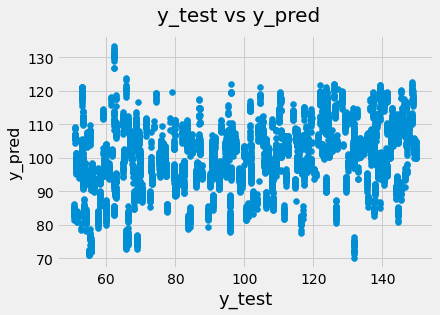

In [69]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(Y_test, Y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

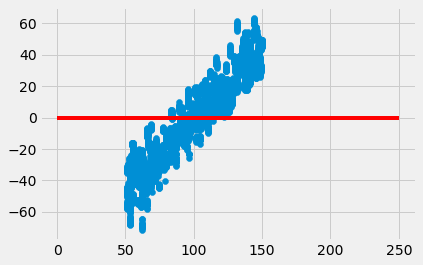

In [71]:
def plot_reg(y_test,y_pred_test):
    resd=y_test-y_pred_test
    plt.scatter(x=y_test,y=resd)
    plt.plot([0,250],[0,0],color='r')

plot_reg(Y_test,Y_pred)

In [72]:
X_train.shape

(29004, 51)

##  Hyperparameter tuning of Linear Regression Model using GridSearchCV approach

In [73]:
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(lin_reg_model,parameters, cv=5)
grid.fit(X_train, Y_train)

Y_pred_grid_lr = grid.predict(X_train)
Y_pred_grid = grid.predict(X_test)


print ("R2 Score Of Linear Regression: ", grid.best_score_)
print("MSE: %.2f" % np.mean((grid.predict(X_test) - Y_test) ** 2))

R2 Score Of Linear Regression:  0.11419277895994791
MSE: 800.58


<h3><font color=orange> (2):- Lasso regression</font></h3>

In [74]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)

y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso = lasso.predict(X_test)

print('Train R2 Score Of Lasso regression: ',lasso.score(X_train, Y_train))
print('Test R2 Score Lasso regression: ',lasso.score(X_test, Y_test))
print() 
print( "Mean absolute Percentage Error Train:- ",mean_absolute_percentage_error(Y_train, y_pred_lasso_train))
print( "Mean absolute Percentage Error Test:- ",mean_absolute_percentage_error(Y_test, y_pred_lasso))
print()
print('Train MSE',mean_squared_error(Y_train, y_pred_lasso_train))
print('Test MSE',mean_squared_error(Y_test, y_pred_lasso))
print()
print('Train RMSE',np.sqrt(mean_absolute_error(Y_train, y_pred_lasso_train)))
print('Test RMSE',np.sqrt(mean_absolute_error(Y_test, y_pred_lasso)))
print() 
print('Train MAE',mean_absolute_error(Y_train, y_pred_lasso_train))
print('Test MAE',mean_absolute_error(Y_test, y_pred_lasso))

Train R2 Score Of Lasso regression:  0.11810466288711419
Test R2 Score Lasso regression:  0.11598767765299256

Mean absolute Percentage Error Train:-  0.2767400280655089
Mean absolute Percentage Error Test:-  0.27992158222479663

Train MSE 793.0697397698757
Test MSE 800.6631873802689

Train RMSE 4.874626804973696
Test RMSE 4.89270435885859

Train MAE 23.76198648776806
Test MAE 23.938555943193847


<h4 style="color: #66ccff">  Hyperparameter tuning of Lasso Regression Model using GridSearchCV approach</h4>

In [75]:
param_grid = { 'alpha': np.arange(0.00, 1.0, 0.01) }
lasso_hyper_model = GridSearchCV(estimator = lasso, param_grid = param_grid, cv = 5, n_jobs=-1)

lasso_hyper_model.fit(X_train, Y_train)
print("Best Score:\n", lasso_hyper_model.best_score_)
print("Best Hyper Parameters:\n", lasso_hyper_model.best_params_)

Best Score:
 0.11419562251905375
Best Hyper Parameters:
 {'alpha': 0.0}


<h3><font color=violet> (3):- Ridge(L1) regression</font></h3>


In [76]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, Y_train)

y_pred_rr_train = rr.predict(X_train)
y_pred_rr = rr.predict(X_test)

print('Train R2 Score Of Ridge regression: ',rr.score(X_train, Y_train))
print('Test R2 Score Ridge regression: ',rr.score(X_test, Y_test))
print()
print( "Mean absolute Percentage Error Train:- ",mean_absolute_percentage_error(Y_train, y_pred_rr_train))
print( "Mean absolute Percentage Error Test:- ",mean_absolute_percentage_error(Y_test, y_pred_rr))
print()
print('Train MSE',mean_squared_error(Y_train, y_pred_rr_train))
print('Test MSE',mean_squared_error(Y_test, y_pred_rr))
print()
print('Train RMSE',np.sqrt(mean_absolute_error(Y_train, y_pred_rr_train)))
print('Test RMSE',np.sqrt(mean_absolute_error(Y_test, y_pred_rr)))
print() 
print('Train MAE',mean_absolute_error(Y_train, y_pred_rr_train))
print('Test MAE',mean_absolute_error(Y_test, y_pred_rr))

Train R2 Score Of Ridge regression:  0.1183461759463702
Test R2 Score Ridge regression:  0.11607828942131926

Mean absolute Percentage Error Train:-  0.27647249941706975
Mean absolute Percentage Error Test:-  0.27969979545823337

Train MSE 792.8525522069135
Test MSE 800.5811189459173

Train RMSE 4.871678415048562
Test RMSE 4.890250314565807

Train MAE 23.733250579650065
Test MAE 23.914548139110977


<h4 style="color: #66ccff">  Hyperparameter tuning of Ridge Regression Model using GridSearchCV approach</h4>

In [77]:
param_grid = { 'alpha': np.arange(0.00, 1.0, 0.01) }
Ridge_hyper_model = GridSearchCV(estimator = rr, param_grid = param_grid, cv = 5, n_jobs=-1)

Ridge_hyper_model.fit(X_train, Y_train)
print("Best Score:\n", Ridge_hyper_model.best_score_)
print("Best Hyper Parameters:\n", Ridge_hyper_model.best_params_)

Best Score:
 0.11419748849289184
Best Hyper Parameters:
 {'alpha': 0.99}


<h3><font color=blue> (4):- ElasticNet Regression</font></h3>

In [78]:
enet = ElasticNet(alpha = 0.01)
enet.fit(X_train, Y_train)

y_pred_enet_train = enet.predict(X_train)
y_pred_enet = enet.predict(X_test)

print('Train R2 Score Of ElasticNet Regression: ',enet.score(X_train, Y_train))
print('Test R2 Score ElasticNet Regression: ',enet.score(X_test, Y_test))
print()
print( "Mean absolute Percentage Error Train:- ",mean_absolute_percentage_error(Y_train, y_pred_enet_train))
print( "Mean absolute Percentage Error Test:- ",mean_absolute_percentage_error(Y_test, y_pred_enet))
print()
print('Train MSE',mean_squared_error(Y_train, y_pred_enet_train))
print('Test MSE',mean_squared_error(Y_test, y_pred_enet))
print()
print('Train RMSE',np.sqrt(mean_absolute_error(Y_train, y_pred_enet_train)))
print('Test RMSE',np.sqrt(mean_absolute_error(Y_test, y_pred_enet)))
print() 
print('Train MAE',mean_absolute_error(Y_train, y_pred_enet_train))
print('Test MAE',mean_absolute_error(Y_test, y_pred_enet))

Train R2 Score Of ElasticNet Regression:  0.11734613170751185
Test R2 Score ElasticNet Regression:  0.11525235127270261

Mean absolute Percentage Error Train:-  0.27713195126823875
Mean absolute Percentage Error Test:-  0.280270820530867

Train MSE 793.7518707438118
Test MSE 801.3291834852154

Train RMSE 4.878719812512979
Test RMSE 4.896217514542558

Train MAE 23.801907009006676
Test MAE 23.9729459497133


<h4 style="color: #66ccff">  Hyperparameter tuning of ElasticNet Regression using GridSearchCV approach</h4>

In [79]:
param_grid = { 'alpha': np.arange(0.00, 1.0, 0.01) }
enet_hyper_model= GridSearchCV(enet, param_grid, cv=5, n_jobs= -1, verbose=1)

enet_hyper_model.fit(X_train, Y_train)
print("Best Score:\n", enet_hyper_model.best_score_)
print("Best Hyper Parameters:\n", enet_hyper_model.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Score:
 0.11419562251905375
Best Hyper Parameters:
 {'alpha': 0.0}


<h3><font color=blue> (5):-  Decision Tree Regressor</font></h3>

In [80]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, Y_train)

y_pred_dt_train = dt.predict(X_train)
y_pred_dt = dt.predict(X_test)

print('Train R2  Score Of Decision Tree: ',dt.score(X_train, Y_train))
print('Test R2 Score Decision Tree: ',dt.score(X_test, Y_test))
print()
print( "Mean absolute Percentage Error Train:- ",mean_absolute_percentage_error(Y_train, y_pred_dt_train))
print( "Mean absolute Percentage Error Test:- ",mean_absolute_percentage_error(Y_test, y_pred_dt))
print()
print('Train MSE',mean_squared_error(Y_train, y_pred_dt_train))
print('Test MSE',mean_squared_error(Y_test, y_pred_dt))
print()
print('Train RMSE',np.sqrt(mean_absolute_error(Y_train, y_pred_dt_train)))
print('Test RMSE',np.sqrt(mean_absolute_error(Y_test, y_pred_dt)))
print() 
print('Train MAE',mean_absolute_error(Y_train, y_pred_dt_train))
print('Test MAE',mean_absolute_error(Y_test, y_pred_dt))

Train R2  Score Of Decision Tree:  1.0
Test R2 Score Decision Tree:  0.9983955685959374

Mean absolute Percentage Error Train:-  1.5003661577517573e-15
Mean absolute Percentage Error Test:-  0.00029466599422114795

Train MSE 3.969378009237482e-26
Test MSE 1.4531575289575294

Train RMSE 3.797215234662192e-07
Test RMSE 0.19980685654632122

Train MAE 1.4418843538350646e-13
Test MAE 0.03992277992292219


<h4 style="color: #66ccff">  Hyperparameter tuning of DecisionTreeClassifier Model using GridSearchCV approach</h4>

In [81]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
}
dt_hyper_model = GridSearchCV(estimator=dt, param_grid=params, cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
dt_hyper_model.fit(X_train, Y_train)
print("Best Hyper Parameters:\n", dt_hyper_model.best_params_)

Fitting 4 folds for each of 25 candidates, totalling 100 fits
Best Hyper Parameters:
 {'max_depth': 2, 'min_samples_leaf': 5}


<h3><font color=blue> (6):- Random Forest Regressor</font></h3>

In [82]:
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, Y_train)

y_pred_forest_train = forest.predict(X_train)
y_pred_forest = forest.predict(X_test)

print('Train R2 Score Of  Random Forest: ',forest.score(X_train, Y_train))
print('Test R2 Score  Random Forest: ',forest.score(X_test, Y_test))
print()
print( "Mean absolute Percentage Error Train:- ",mean_absolute_percentage_error(Y_train, y_pred_forest_train))
print( "Mean absolute Percentage Error Test:- ",mean_absolute_percentage_error(Y_test, y_pred_forest))
print()
print('Train MSE',mean_squared_error(Y_train, y_pred_forest_train))
print('Test MSE',mean_squared_error(Y_test, y_pred_forest))
print()
print('Train RMSE',np.sqrt(mean_absolute_error(Y_train, y_pred_forest_train)))
print('Test RMSE',np.sqrt(mean_absolute_error(Y_test, y_pred_forest)))
print() 
print('Train MAE',mean_absolute_error(Y_train, y_pred_forest_train))
print('Test MAE',mean_absolute_error(Y_test, y_pred_forest))

Train R2 Score Of  Random Forest:  0.99983662345456
Test R2 Score  Random Forest:  0.9990229751019811

Mean absolute Percentage Error Train:-  0.00024359738685887612
Mean absolute Percentage Error Test:-  0.0005886552873943312

Train MSE 0.14692105618880597
Test MSE 0.8849060688665216

Train RMSE 0.16850717996828068
Test RMSE 0.26977856540509354

Train MAE 0.02839466970086254
Test MAE 0.07278047435203032


<h4 style="color: #66ccff">  Hyperparameter tuning of RandomForestClassifier Model using GridSearchCV approach</h4>

In [83]:
param_rf = { "bootstrap": [True, False], "max_depth": (3, 17), "n_estimators": (10, 30)}
rf_hyper_model= GridSearchCV(forest, param_rf, cv=5, n_jobs= -1, verbose=1)
rf_hyper_model.fit(X_train, Y_train)

print("Best Score:\n", rf_hyper_model.best_score_)
print("Best Hyper Parameters:\n", rf_hyper_model.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Score:
 0.99719729367099
Best Hyper Parameters:
 {'bootstrap': True, 'max_depth': 17, 'n_estimators': 30}


<h3><font color=blue> (7):- XGBoost Regression</font></h3>

In [84]:
xgb = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 20, seed = 123)
xgb.fit(X_train, Y_train)

y_pred_xgb_train = xgb.predict(X_train)
y_pred_xgb = xgb.predict(X_test)

print('Train R2 Score Of XGBoost: ',xgb.score(X_train, Y_train))
print('Test R2 Score XGBoost: ',xgb.score(X_test, Y_test))
print()
print( "Mean absolute Percentage Error Train:- ",mean_absolute_percentage_error(Y_train, y_pred_xgb_train))
print( "Mean absolute Percentage Error Test:- ",mean_absolute_percentage_error(Y_test, y_pred_xgb))
print()
print('Train MSE',mean_squared_error(Y_train, y_pred_xgb_train))
print('Test MSE',mean_squared_error(Y_test, y_pred_xgb))
print()
print('Train RMSE',np.sqrt(mean_absolute_error(Y_train, y_pred_xgb_train)))
print('Test RMSE',np.sqrt(mean_absolute_error(Y_test, y_pred_xgb)))
print() 
print('Train MAE',mean_absolute_error(Y_train, y_pred_xgb_train))
print('Test MAE',mean_absolute_error(Y_test, y_pred_xgb))

Train R2 Score Of XGBoost:  0.07743901970633493
Test R2 Score XGBoost:  0.07971274170911746

Mean absolute Percentage Error Train:-  0.24079478111567582
Mean absolute Percentage Error Test:-  0.2430430817825212

Train MSE 829.6394886932981
Test MSE 833.5179396282102

Train RMSE 4.8953319263388275
Test RMSE 4.910527817895012

Train MAE 23.964274669032214
Test MAE 24.113283450320754


<h4 style="color: #66ccff">  Hyperparameter tuning of XGBoost Regression Model using GridSearchCV approach</h4>

In [85]:
params = { 'max_depth': [3,6,10],
           'n_estimators': [100, 500, 1000]}

clf = GridSearchCV(estimator=xgb, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, Y_train)
print("Best parameters:", clf.best_params_)
print("Best Hyper Parameters:\n", clf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


KeyboardInterrupt: ignored

<h3><font color=blue> (8):- KNN (K-Nearest Neighbor)</font></h3>

In [86]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 36)
knn.fit(X_train,Y_train)

y_pred_knn_train = knn.predict(X_train)
y_pred_knn = knn.predict(X_test)

print('Train R2 Score Of KNN: ',knn.score(X_train, Y_train))
print('Test R2 Score KNN: ',knn.score(X_test, Y_test))
print()
print( "Mean absolute Percentage Error Train:- ",mean_absolute_percentage_error(Y_train, y_pred_knn_train))
print( "Mean absolute Percentage Error Test:- ",mean_absolute_percentage_error(Y_test, y_pred_knn))
print()
print('Train MSE',mean_squared_error(Y_train, y_pred_knn_train))
print('Test MSE',mean_squared_error(Y_test, y_pred_knn))
print()
print('Train RMSE',np.sqrt(mean_absolute_error(Y_train, y_pred_knn_train)))
print('Test RMSE',np.sqrt(mean_absolute_error(Y_test, y_pred_knn)))
print() 
print('Train MAE',mean_absolute_error(Y_train, y_pred_knn_train))
print('Test MAE',mean_absolute_error(Y_test, y_pred_knn))

Train R2 Score Of KNN:  0.4709381689705381
Test R2 Score KNN:  0.4434818177741676

Mean absolute Percentage Error Train:-  0.198894117076466
Mean absolute Percentage Error Test:-  0.207052118330186

Train MSE 475.77406410869946
Test MSE 504.0468445428528

Train RMSE 4.145646843280232
Test RMSE 4.218710616612106

Train MAE 17.186387749199348
Test MAE 17.797519266715696


<h4 style="color: #66ccff">  Selecting K-value for knn model</h4> 

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(Y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

<h2><font color=#FF0000> Note</font></h2>

- The RMSE value decreases as we increase the k value. At k= 5, the RMSE is approximately 18.42, and shoots up on further increasing the k value. We can safely say that k=7 will give us the best result in this case.

In [ ]:
knn_final = neighbors.KNeighborsRegressor(n_neighbors = 5)
knn_final.fit(X_train,Y_train)

y_pred_knn_final_train = knn_final.predict(X_train)
y_pred_knn_final = knn_final.predict(X_test)

print('Train R2 Score Of KNN: ',knn_final.score(X_train, Y_train))
print('Test R2 Score KNN: ',knn_final.score(X_test, Y_test))
print()
print( "Mean absolute Percentage Error Train:- ",mean_absolute_percentage_error(Y_train, y_pred_knn_final_train))
print( "Mean absolute Percentage Error Test:- ",mean_absolute_percentage_error(Y_test, y_pred_knn_final))
print()
print('Train MSE',mean_squared_error(Y_train, y_pred_knn_final_train))
print('Test MSE',mean_squared_error(Y_test, y_pred_knn_final))
print()
print('Train RMSE',np.sqrt(mean_absolute_error(Y_train, y_pred_knn_final_train)))
print('Test RMSE',np.sqrt(mean_absolute_error(Y_test, y_pred_knn_final)))
print() 
print('Train MAE',mean_absolute_error(Y_train, y_pred_knn_final_train))
print('Test MAE',mean_absolute_error(Y_test, y_pred_knn_final))

<h3 style="color: blue"> STEP: 7 Design, develop and train the Pipeline </h3>
Loading Dependencies

In [90]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.feature_selection import f_regression,SelectFromModel,SequentialFeatureSelector,SelectKBest
from sklearn import set_config
set_config(display='diagram')
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [91]:
df_pipe = pd.read_csv('Train.csv')
df_pipe.shape

(36256, 41)

In [92]:
df_pipe_test = df_pipe.sample(frac=0.2)

<h4><font color=#FF0000> Filtering sample from train data as test data is already processed. Typically when our code runs to prodcution, data is not processed.</font></h4>

In [93]:
df_pipe_train = df_pipe.loc[df_pipe.index.difference(df_pipe_test.index)] #.drop(columns=['row_id'])

In [94]:
df_pipe_train.head()

row_id      food_category     food_department     food_family  \
0       1  Bathroom Products  Health and Hygiene  Non-Consumable   
3       4              Fruit     Canned Products            Food   
4       5     Paper Products           Household  Non-Consumable   
5       6        Snack Foods         Snack Foods            Food   
7       8       Baking Goods        Baking Goods            Food   

   store_sales(in millions)  store_cost(in millions)  unit_sales(in millions)  \
0                      4.35                   1.3485                        3   
3                      4.20                   2.0580                        3   
4                     10.35                   3.5190                        3   
5                      6.36                   2.7348                        4   
7                      2.32                   1.1600                        2   

          promotion_name sales_country marital_status  ... grocery_sqft  \
0       Double Down Sale        Canada              M  ...        16418   
3  Cash Register Lottery           USA              S  ...        18670   
4           One Day Sale        Mexico              S  ...        30351   
5    Shelf Clearing Days           USA              S  ...        24390   
7         Savings Galore           USA              M  ...        13305   

   frozen_sqft meat_sqft coffee_bar video_store salad_bar  prepared_food  \
0         4016      2678          1           1         1              1   
3         5415      3610          1           1         1              1   
4         4819      3213          0           0         0              0   
5         9184      6122          0           0         1              1   
7         4746      3164          1           0         0              0   

  florist              media_type    cost  
0       1   Cash Register Handout  142.71  
3       1  Daily Paper, Radio, TV   55.59  
4       0          Street Handout  146.72  
5       0         In-Store Coupon  109.21  
7       0          Street Handout  138.53  

[5 rows x 41 columns]

In [95]:
Y = df_pipe_train['cost']
X = df_pipe_train.drop(columns=['cost'])

In [96]:
Y = pd.DataFrame(Y)

In [97]:
X.reset_index(drop=True, inplace=True)
Y.reset_index(drop=True, inplace=True)

In [98]:
Y_test_act = df_pipe_test['cost']
df_pipe_test.drop(columns=['cost'], inplace=True)
Y_test_act.reset_index(drop=True, inplace=True)
df_pipe_test.reset_index(drop=True, inplace=True)

<h4><font color=#FF0000> Made custom functions to used inside the pipeline transformers, it is based on the function used earlier for analysis.</font></h4>

In [99]:
def process_outlier(df):
    col_names = ['store_sales(in millions)','store_cost(in millions)']
    for col_name in col_names:
        q1= df[col_name].quantile(0.25)
        q3= df[col_name].quantile(0.75)
        iqr= q3-q1
        Lower_tail=q1-1.5*iqr
        Upper_tail=q3+1.5*iqr
        for i in range(0,len(df[col_name])):
            if df[col_name][i] > Upper_tail or df[col_name][i] < Lower_tail:
                df[col_name] = df[col_name].replace(df[col_name][i],np.median(df[col_name]))
    
    return df

In [100]:
def drop_columns(df):
    df.drop(columns= ['row_id','avg_cars_at home(approx).1','meat_sqft', 'salad_bar','gross_weight',
                      'store_sales(in millions)', 'store_cost(in millions)', 'store_sqft',
                      'food_category', 'food_department', 'food_family', 'brand_name'], inplace=True)
    return df
  
def process_outliers_continuous(df):
    continuous_features = df.select_dtypes(include=[np.int64,np.float64])
    No_outliers_col = []
    delete_col = []
    
    for col_name in continuous_features:
        skew_val = df[[col_name]].skew().values[0] 
        if skew_val > 1 and col_name != 'num_children_at_home':
            df[col_name]= np.log10(df[col_name])
        elif skew_val > 0.5 and col_name != 'Total Accounts':
            df[col_name]= np.sqrt(df[col_name])
    
    return df

def encodeCategorialValues(df):
    col_names_values = dict()
    non_catagorial = list(df.select_dtypes(include=[np.object]))
    for columnName in non_catagorial:
        unique_val = len(df[columnName].unique())
        value = np.sort(df[columnName].unique())
        col_names_values[columnName] = list(value)
        lst = list(value)
        test_dict = dict()
        for i in value:
            test_dict[i] = lst.index(i)
        df[columnName] = df[columnName].map(test_dict)
    return df

# **Pipeline building**

In [101]:
trf1 = FunctionTransformer(process_outlier)
trf2 = FunctionTransformer(drop_columns)
trf3 = FunctionTransformer(encodeCategorialValues)
trf4 = SelectKBest(score_func=f_regression,k=8)
trf5 = RandomForestRegressor()

In [102]:
pipe = Pipeline([('process_outlier', trf1),
                ('drop_columns', trf2),
                ('encode_categorical_vals', trf3),
                ('feature_selection', trf4),
                ('train', trf5)]
                )

In [103]:
pipe.fit(X,Y)

Pipeline(steps=[('process_outlier',
                 FunctionTransformer(func=<function process_outlier at 0x7f07141311f0>)),
                ('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x7f0714343ca0>)),
                ('encode_categorical_vals',
                 FunctionTransformer(func=<function encodeCategorialValues at 0x7f0714343820>)),
                ('feature_selection',
                 SelectKBest(k=8,
                             score_func=<function f_regression at 0x7f071fd0a8b0>)),
                ('train', RandomForestRegressor())])

In [104]:
pipe.named_steps['feature_selection']

SelectKBest(k=8, score_func=<function f_regression at 0x7f071fd0a8b0>)

### **Comparing the evaluation metrics of the base model and the tuned model and writing conclusions. Aslo, the steps taken to improve the performance of the model.**

In [105]:
np.sqrt(mean_absolute_error(Y_test_act, pipe.predict(df_pipe_test)))

3.8113386715360145

In [106]:
import pickle
pickle.dump(pipe, open('model.pkl', 'wb'))
model=pickle.load(open('model.pkl', 'rb'))

<h4 style="color: blue">STEP 8</h4>

<h4 style="color: #66ccff">Linear Regression Base Model</h4>

Train R2 Score Of Linear Regression:  0.0954127994241738
Test R2 Score Linear Regression:  0.09700030561843187

<h4 style="color: #66ccff">Random Forest Base Model</h4>

Train R2 Score Of  Random Forest:  0.9998232139847923
Test R2 Score  Random Forest:  0.998913645321768


<h4 style="color: #66ccff">Random Forest Model score after hyperparameter tuning</h4>

Best R2 score: .9971852037905068
Best Hyper Parameters: 'bootstrap': True, 'max_depth': 17, 'n_estimators': 30}

<h4 style="color: #990000"> Based on the conducted study, key findings are: <br \> 1. There is considerable improvement in the r2 score from the base regression model when random forest model is used. <br \> 2. Best performance w.r.t r-square score is obtained using random forest model. <br \ >3. There is no considerable impact on performance after Hyperparameter tuning in the random forest model</h4>


<h4 style="color: #990000"> FUTURE IMPROVEMENTS <br \> 
1. As a next steps, we can explore more features which can potentially impact the media cost. <br \> 
2. Further we can try applying PCA(principle component analysis) to reduce multicollinearity. <br \> 
3. Also, we can explore state of art deep neural network to capture variations in the data. <br \></h4>

<h2 style="color: #ff6600"><center>Thank you :-) </center></h2>